In [7]:
import pandas as pd 
import numpy as np
import xlrd 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [10]:
data = pd.read_excel('telcom_data.xlsx')

KeyboardInterrupt: 

In [ ]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
data.shape

(150001, 55)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

# Find the missing value in the data set:

In [ ]:
def missing_percentage(dataset):
    total_rows = len(dataset)
    for column in dataset.columns:
        missing_count = dataset[column].isnull().sum()
        if missing_count > 0:
            missing_percentage = (missing_count / total_rows) * 100
            print(f"Feature '{column}' has : - {missing_percentage:.5f}% - missing data.")

In [ ]:
missing_percentage(data)

Feature 'Start' has : - 0.00067% - missing data.
Feature 'Start ms' has : - 0.00067% - missing data.
Feature 'End' has : - 0.00067% - missing data.
Feature 'End ms' has : - 0.00067% - missing data.
Feature 'Dur. (ms)' has : - 0.00067% - missing data.
Feature 'IMSI' has : - 0.38000% - missing data.
Feature 'MSISDN/Number' has : - 0.71066% - missing data.
Feature 'IMEI' has : - 0.38133% - missing data.
Feature 'Last Location Name' has : - 0.76866% - missing data.
Feature 'Avg RTT DL (ms)' has : - 18.55254% - missing data.
Feature 'Avg RTT UL (ms)' has : - 18.54121% - missing data.
Feature 'Avg Bearer TP DL (kbps)' has : - 0.00067% - missing data.
Feature 'Avg Bearer TP UL (kbps)' has : - 0.00067% - missing data.
Feature 'TCP DL Retrans. Vol (Bytes)' has : - 58.76361% - missing data.
Feature 'TCP UL Retrans. Vol (Bytes)' has : - 64.43224% - missing data.
Feature 'DL TP < 50 Kbps (%)' has : - 0.50266% - missing data.
Feature '50 Kbps < DL TP < 250 Kbps (%)' has : - 0.50266% - missing data.

# Detecting the outliers in the data set

# Finding out numerical variable in the data set

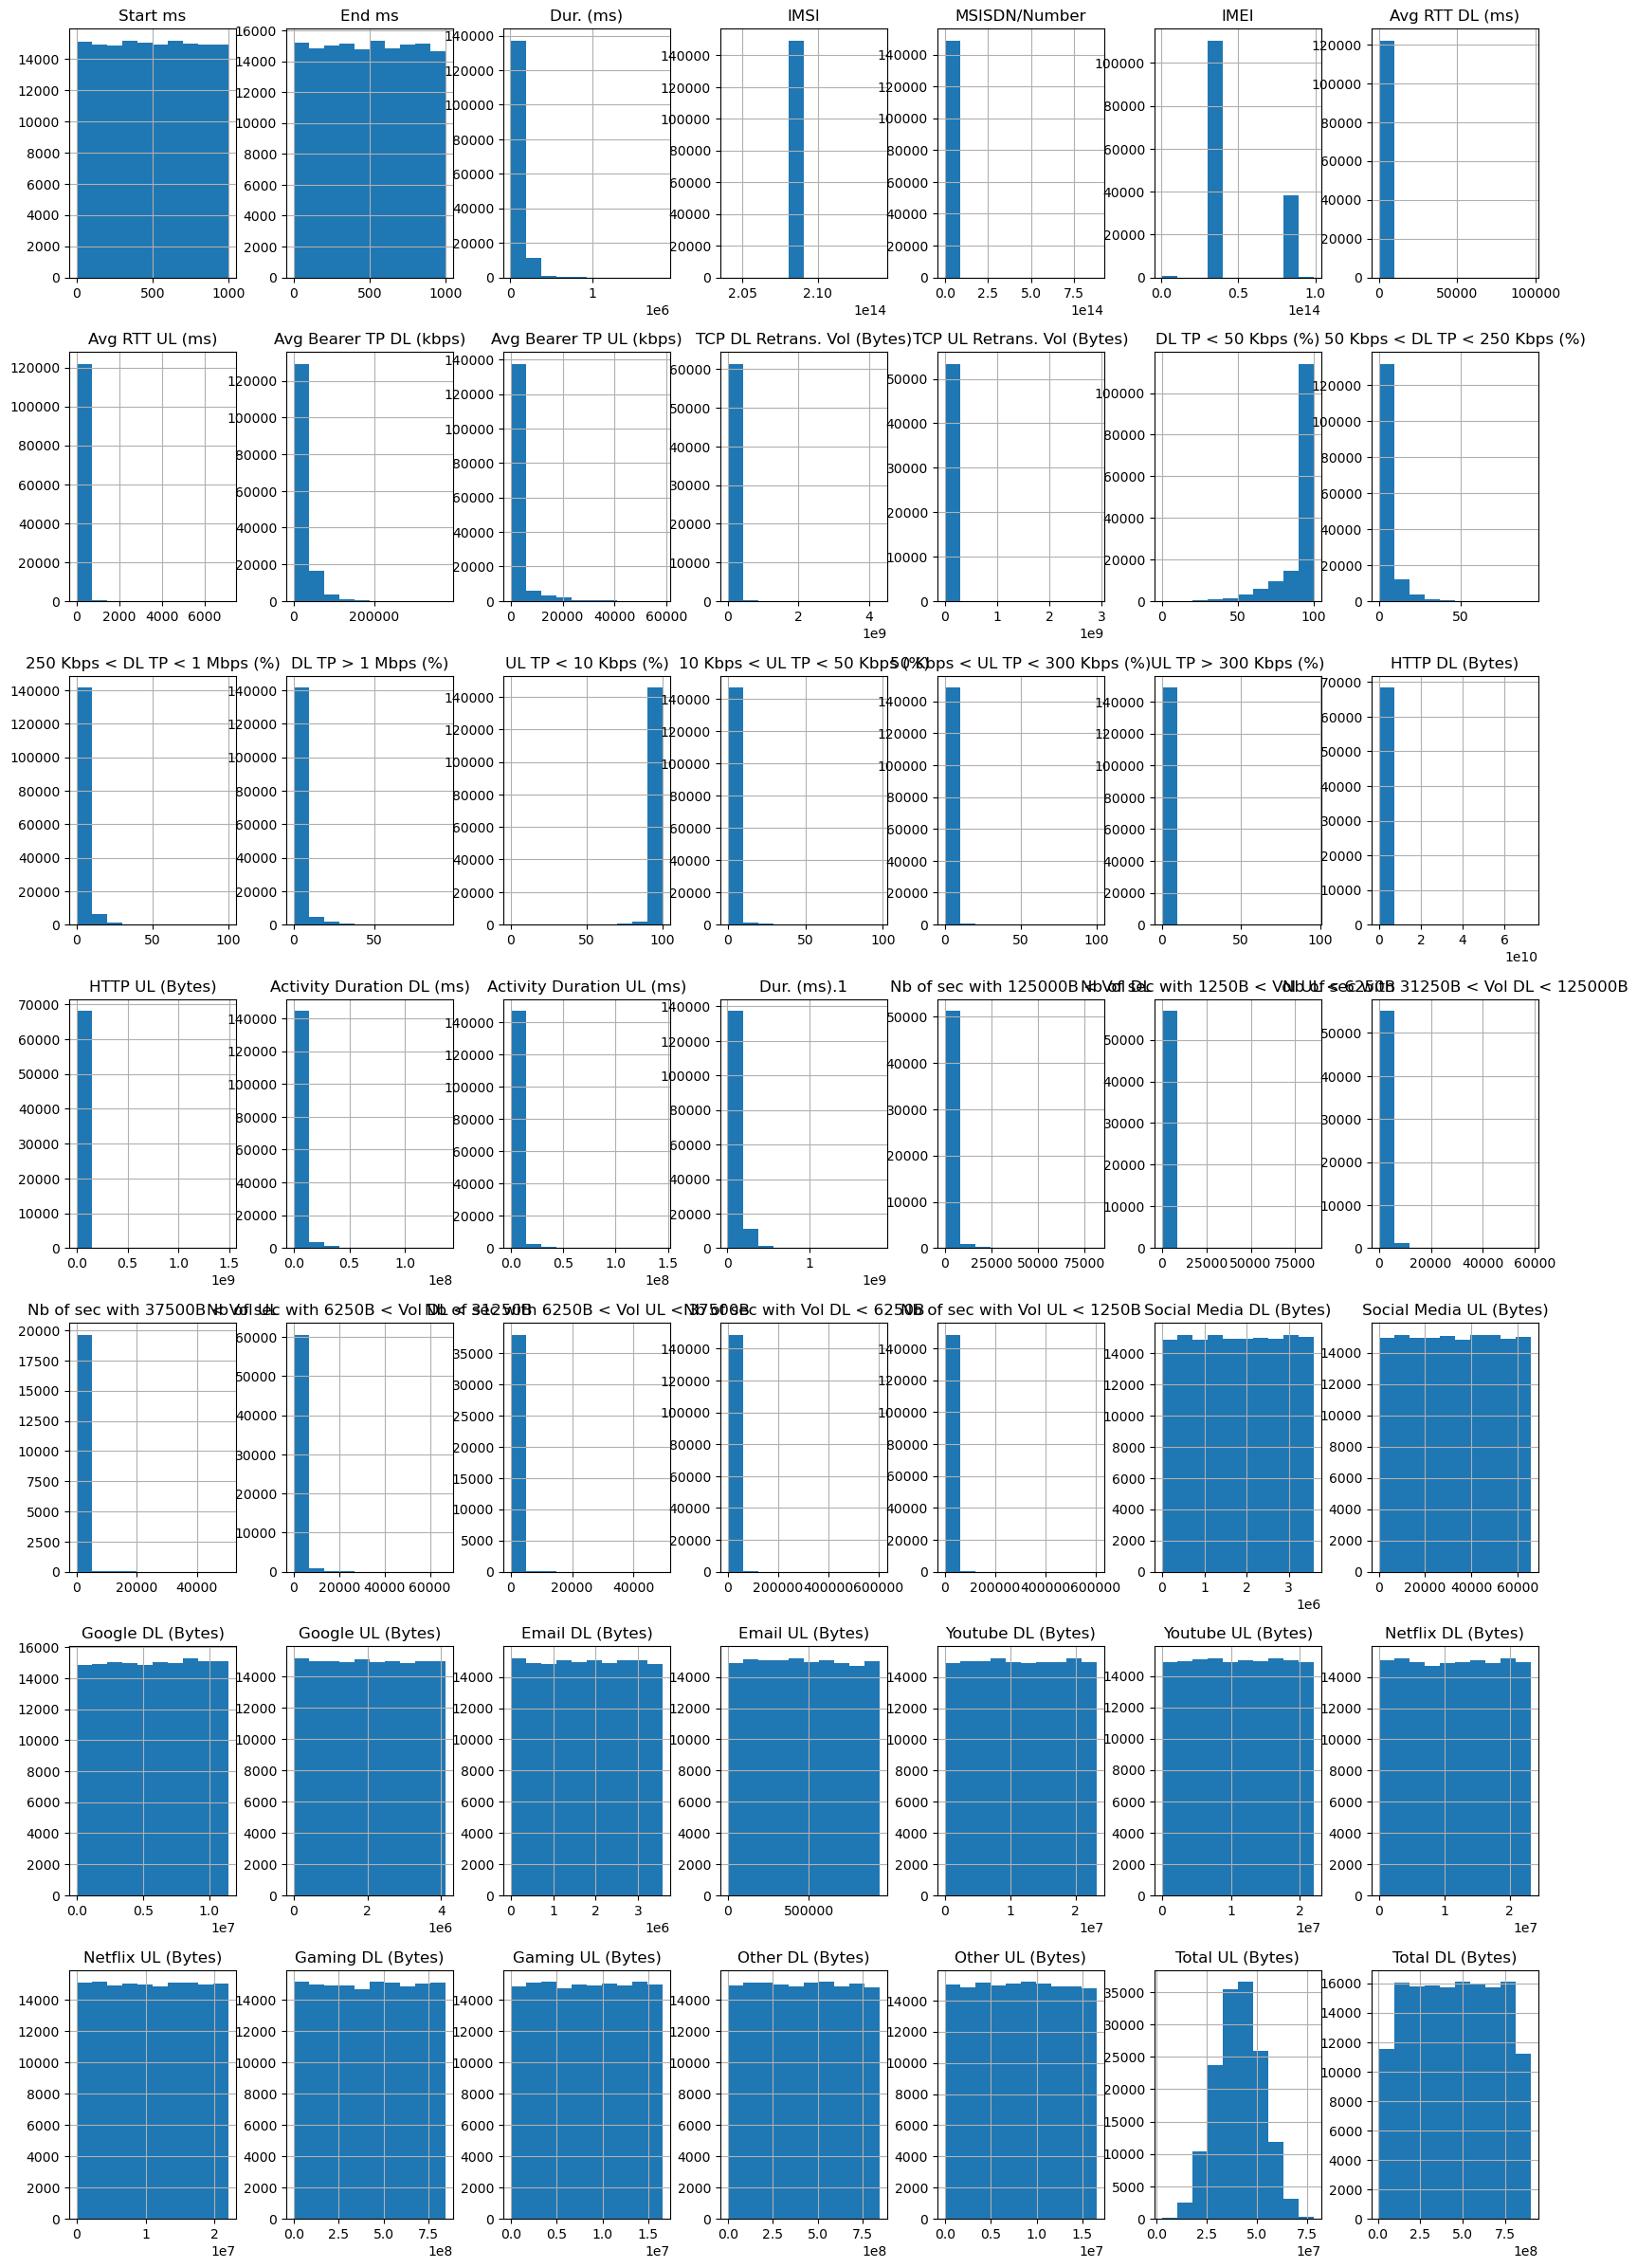

In [ ]:
numeric_data = data.select_dtypes(include='number')
numeric_data.hist(figsize=(20,30), bins=10);

In [ ]:
# Detecting Outliers using IQR:


def detect_outliers_iqr(data):
    outliers = {}
    for col in data.columns:
        if data[col].dtype in ['int64', 'float64']:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            

            outlier_indices = (data[col] < lower_bound) | (data[col] > upper_bound)
            outliers[col] = data[col][outlier_indices]
    
    return outliers


outliers = detect_outliers_iqr(data)
outliers

{'Start ms': Series([], Name: Start ms, dtype: float64),
 'End ms': Series([], Name: End ms, dtype: float64),
 'Dur. (ms)': 0         1823652.0
 1         1365104.0
 2         1361762.0
 3         1321509.0
 4         1089009.0
             ...    
 127745     260043.0
 127753     253160.0
 127831     245667.0
 127842     248300.0
 127855     247268.0
 Name: Dur. (ms), Length: 7184, dtype: float64,
 'IMSI': 2         2.082003e+14
 9         2.082003e+14
 10        2.082098e+14
 12        2.082003e+14
 13        2.082003e+14
               ...     
 149933    2.082099e+14
 149959    2.082095e+14
 149960    2.082003e+14
 149972    2.082003e+14
 149994    2.082003e+14
 Name: IMSI, Length: 13250, dtype: float64,
 'MSISDN/Number': 2         3.376063e+10
 3         3.375034e+10
 7         3.376349e+10
 15        3.375376e+10
 19        3.376060e+10
               ...     
 149979    3.376185e+10
 149985    3.378663e+10
 149990    3.376127e+10
 149991    3.376215e+10
 149992    3.376127e+10
 

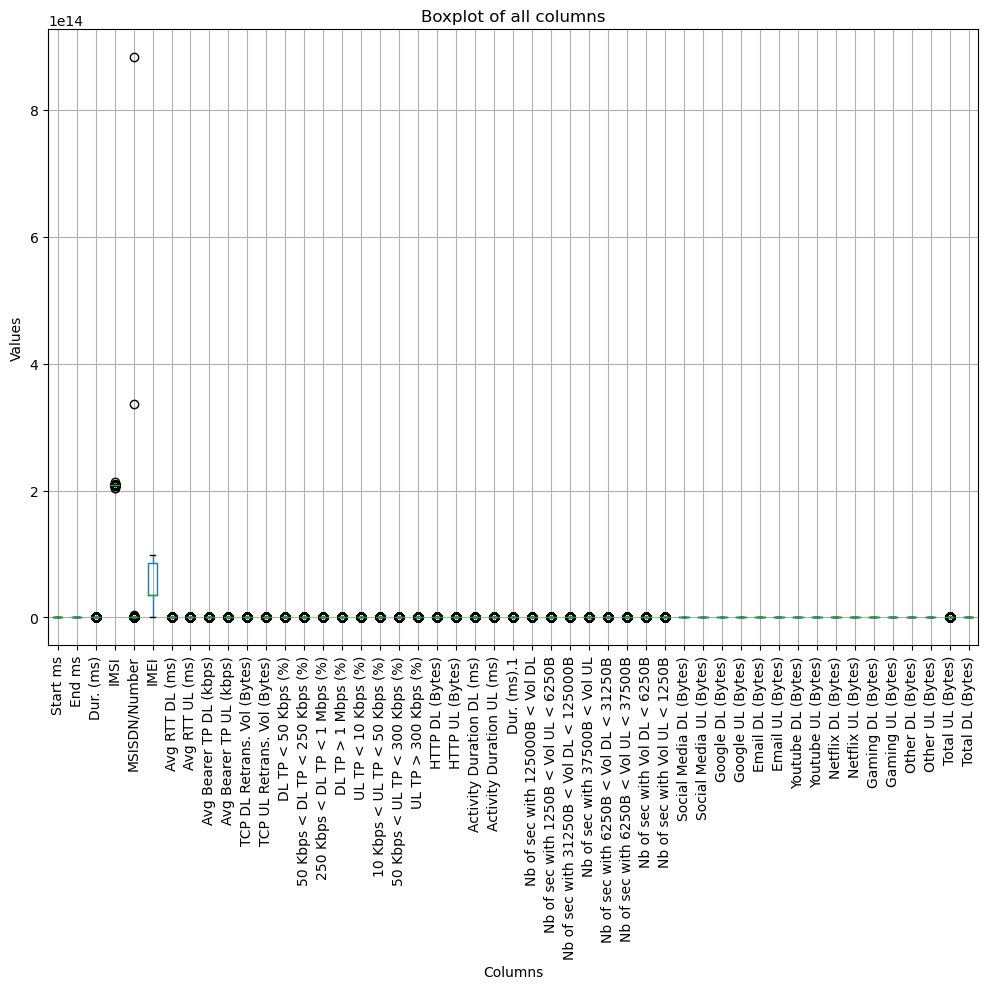

In [ ]:
def plot_outliers(df):
    
    plt.figure(figsize=(12, 8))
    df.boxplot(rot=90)
    plt.title('Boxplot of all columns')
    plt.ylabel('Values')
    plt.xlabel('Columns')
    plt.grid(True)
    plt.show()

plot_outliers(data)

**from the above we found that there are outliers in the data set**

In [ ]:
# inspecting categorical column

In [ ]:
data[ 'Handset Manufacturer'].sort_values().unique()

array(['A-Link Telecom International Co Limited', 'ASUSTeK', 'Acer',
       'Adar', 'Alif Communications', 'Apple', 'Archos SA', 'Archos Sa',
       'Asustek', 'Avenir Telecom', 'Beijing Shenqi Technology Co Ltd',
       'Bird', 'Blu Products Inc', 'Bullitt Group Limited',
       'Casper Bilgisayar Sistemleri A.S', 'China Trade Group S.A.S',
       'Cisco Systems Inc (Including All Affiliates)',
       'Civicom Technology (Hk) Co Limited', 'Ck Telecom Limited',
       'Compal Electronics Inc',
       'Concox Information Technology (Hong Kong) Co Ltd', 'Crosscall',
       'D-Link Corporation', 'DDM Brands LLC', 'DN Electronics',
       'Ddm Brands Llc', 'Dg Homtom Group Co Limited', 'Dn Electronics',
       'Doke Communication (Hk) Limited', 'Doro AB', 'Doro Ab',
       'Dynamic Tech Holdings Limited', 'Ecom Instruments GmbH',
       'Electro Depot France Sas', 'Ertebat Hamrah Guya Arvand',
       'Essential Products Inc.', 'Fairphone B.V',
       'Fully Holdings (Hk) Co Limited', 'Gema

**here we have to do  same formatting for ZyXEL Communications Corp and Zyxel Communications Corp and also we have to remove the nan**

In [ ]:
# changing data type for IMEI, MSISDN/Number and IMSI from integer to object/string:

In [ ]:
clean_df = data.copy()

In [ ]:
clean_df.IMEI = clean_df.IMEI.astype('object')
clean_df.IMSI = clean_df.IMSI.astype('object')
clean_df['MSISDN/Number'] = clean_df['MSISDN/Number'].astype('object')

# Dealing with outliers:

In [ ]:
Q1 = clean_df.quantile(0.25)
Q3 = clean_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14460\3966662461.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = clean_df.quantile(0.25)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14460\3966662461.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = clean_df.quantile(0.75)


Start ms                                    4.990000e+02
End ms                                      4.990000e+02
Dur. (ms)                                   7.498975e+04
Avg RTT DL (ms)                             3.800000e+01
Avg RTT UL (ms)                             1.300000e+01
Avg Bearer TP DL (kbps)                     1.966775e+04
Avg Bearer TP UL (kbps)                     1.073000e+03
TCP DL Retrans. Vol (Bytes)                 3.732657e+06
TCP UL Retrans. Vol (Bytes)                 7.932550e+04
DL TP < 50 Kbps (%)                         9.000000e+00
50 Kbps < DL TP < 250 Kbps (%)              4.000000e+00
250 Kbps < DL TP < 1 Mbps (%)               1.000000e+00
DL TP > 1 Mbps (%)                          0.000000e+00
UL TP < 10 Kbps (%)                         1.000000e+00
10 Kbps < UL TP < 50 Kbps (%)               0.000000e+00
50 Kbps < UL TP < 300 Kbps (%)              0.000000e+00
UL TP > 300 Kbps (%)                        0.000000e+00
HTTP DL (Bytes)                

In [ ]:
num_data2 = clean_df.select_dtypes(include='number')

In [ ]:
outliers =  pd.DataFrame(((((num_data2 < (Q1 - 1.5 * IQR)) |(num_data2 > (Q3 + 1.5 * IQR)))==True)==True).any()).reset_index()
outliers

,index,0
0,Start ms,False
1,End ms,False
2,Dur. (ms),True
3,Avg RTT DL (ms),True
4,Avg RTT UL (ms),True
5,Avg Bearer TP DL (kbps),True
6,Avg Bearer TP UL (kbps),True
7,TCP DL Retrans. Vol (Bytes),True
8,TCP UL Retrans. Vol (Bytes),True
9,DL TP < 50 Kbps (%),True


In [ ]:
outliers_cols = outliers['index'].tolist()

In [ ]:
# replacing outliers with the mean of the data set:

def outlier_replace(df, cols):
    for col in cols:
        df[cols] = np.where(((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))), df[cols].mean(), df[cols])

In [ ]:
outlier_replace(clean_df, outliers_cols)

In [ ]:
clean_df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,104608.560347,208201448079117.0,33664962239.0,35521209507511.0,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,104608.560347,208201909211140.0,33681854413.0,35794009006359.0,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,104608.560347,208200314458056.0,33760627129.0,35281510359387.0,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,104608.560347,208201402342131.0,33750343200.0,35356610164913.0,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,104608.560347,208201401415120.0,33699795932.0,35407009745539.0,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.000000,208202201200072.0,33650688697.0,35483109451938.0,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.000000,208201908153249.0,33663449963.0,35660508296467.0,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.000000,208201711161187.0,33621890103.0,35721209870907.0,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.000000,208202101098075.0,33619622058.0,86186204011457.0,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [ ]:
nume_data3 = clean_df.select_dtypes(include='number')

In [ ]:
(((nume_data3 < (Q1 - 1.5 * IQR)) |(nume_data3 > (Q3 + 1.5 * IQR)))==True).any()

Start ms                                    False
End ms                                      False
Dur. (ms)                                   False
Avg RTT DL (ms)                             False
Avg RTT UL (ms)                             False
Avg Bearer TP DL (kbps)                     False
Avg Bearer TP UL (kbps)                     False
TCP DL Retrans. Vol (Bytes)                 False
TCP UL Retrans. Vol (Bytes)                 False
DL TP < 50 Kbps (%)                         False
50 Kbps < DL TP < 250 Kbps (%)              False
250 Kbps < DL TP < 1 Mbps (%)               False
DL TP > 1 Mbps (%)                           True
UL TP < 10 Kbps (%)                         False
10 Kbps < UL TP < 50 Kbps (%)                True
50 Kbps < UL TP < 300 Kbps (%)               True
UL TP > 300 Kbps (%)                         True
HTTP DL (Bytes)                             False
HTTP UL (Bytes)                             False
Activity Duration DL (ms)                   False


**Now outliers is removed from the data set**

# Replacing missing value with the mean in numerical variables

In [ ]:
numeric_data = clean_df.select_dtypes(include='number')
clean_df[numeric_data.columns]=clean_df[numeric_data.columns].apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
clean_df.columns[clean_df.isnull().any()].tolist()

['Start',
 'End',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Handset Manufacturer',
 'Handset Type']

**now we can see that the the null value are replace with the mean of the numerical variables**

# Replacing missing value with the mode in categorical variables

In [ ]:
categ_data = clean_df.columns[clean_df.isna().any()].tolist()
clean_df[categ_data].dtypes


Start                   datetime64[ns]
End                     datetime64[ns]
IMSI                            object
MSISDN/Number                   object
IMEI                            object
Last Location Name              object
Handset Manufacturer            object
Handset Type                    object
dtype: object

In [ ]:
clean_df['IMEI'] = clean_df['IMEI'].astype(float)
clean_df['IMSI'] = clean_df['IMSI'].astype(float)
clean_df['MSISDN/Number'] = clean_df['MSISDN/Number'].astype(float)

In [ ]:
clean_df[categ_data]=clean_df[categ_data].apply(lambda x: x.fillna(x.mode()[0]),axis=0)

In [ ]:
clean_df.columns[clean_df.isna().any()].tolist()

[]

In [ ]:
# now there is no null value in the data set

In [ ]:
clean_df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


**Here we found that Dur.(ms).1 is copy of Dur.(ms) so we need to drop any one column**

In [ ]:
clean_df.drop('Dur. (ms)', axis=1, inplace=True)

In [ ]:
cols = clean_df.columns.to_list()

In [ ]:
clean_df.rename(columns= lambda x : x.lower().replace(' ', '_').replace('/', '_').replace(')', '_').replace('.', '_').replace('(', '_').strip() if x in cols else x, inplace=True)

In [ ]:
clean_df.handset_manufacturer = clean_df.handset_manufacturer.apply(lambda x: x.lower().strip())
clean_df.handset_type = clean_df.handset_type.apply(lambda x: x.lower().strip())

In [ ]:
clean_df.handset_manufacturer.unique()

array(['samsung', 'undefined', 'huawei', 'apple', 'zte',
       'tp-link technologies co ltd', 'ertebat hamrah guya arvand',
       'wiko global sasu', 'tcl communication ltd',
       'oneplus technology (shenzhen) co ltd', 'zebra technologies corp.',
       'nokia', 'wiko', 'lenovo', 'asustek',
       'xiaomi communications co ltd', 'rim', 'hmd global oy',
       'sony mobile communications ab', 'd-link corporation', 'wct',
       'dn electronics', 'netgear inc', 'neel enterprise',
       'teletalk pvt ltd', 'ddm brands llc', 'sierra wireless',
       'google inc', 'shenzhen chainway information technology co ltd',
       'microsoft mobile oy', 'htc', 'crosscall',
       'shenzhen kdi communication co ltd',
       'simcom wireless solutions co ltd',
       'qingdao hisense communications co ltd', 'lg', 'archos sa',
       'hewlett-packard', 'spa condor electronics',
       'sonaki corporation s.a.', 'new-bund technology co limited',
       'meizu technology co ltd', 'doro ab',
       

In [ ]:
clean_df['imei'] = clean_df['imei'].astype(object)
clean_df['imsi'] = clean_df['imsi'].astype(object)
clean_df['msisdn_number'] = clean_df['msisdn_number'].astype(object)


In [ ]:
clean_df.to_csv('clean.csv')

# Task 1 - User Overview Analysis 

In [ ]:
clean = clean_df

In [ ]:
clean.head()

,bearer_id,start,start_ms,end,end_ms,imsi,msisdn_number,imei,last_location_name,avg_rtt_dl__ms_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,208201448079117.0,33664962239.0,35521209507511.0,9164566995485190,42.000000,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,208201909211140.0,33681854413.0,35794009006359.0,L77566A,65.000000,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,208200314458056.0,33760627129.0,35281510359387.0,D42335A,54.448072,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,208201402342131.0,33750343200.0,35356610164913.0,T21824A,54.448072,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,208201401415120.0,33699795932.0,35407009745539.0,D88865A,54.448072,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
# selecting columns to work with the analysis:

In [ ]:
columns = ['bearer_id', 'msisdn_number','dur___ms__1','http_dl__bytes_',
           'http_ul__bytes_', 'activity_duration_dl__ms_',
           'activity_duration_ul__ms_',
           'handset_manufacturer', 'handset_type',
          'social_media_dl__bytes_', 'social_media_ul__bytes_',
       'google_dl__bytes_', 'google_ul__bytes_', 'email_dl__bytes_',
       'email_ul__bytes_', 'youtube_dl__bytes_', 'youtube_ul__bytes_',
       'netflix_dl__bytes_', 'netflix_ul__bytes_', 'gaming_dl__bytes_',
       'gaming_ul__bytes_', 'other_dl__bytes_', 'other_ul__bytes_',
       'total_ul__bytes_', 'total_dl__bytes_']

In [ ]:
data = clean[columns]

In [ ]:
data.head()

,bearer_id,msisdn_number,dur___ms__1,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,handset_manufacturer,handset_type,social_media_dl__bytes_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,33664962239.0,1.046091e+08,9.783913e+06,931706.962231,37624.0,38787.0,samsung,samsung galaxy a5 sm-a520f,1545765.0,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,33681854413.0,1.046091e+08,9.783913e+06,931706.962231,168.0,3560.0,samsung,samsung galaxy j5 (sm-j530),1926113.0,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,33760627129.0,1.046091e+08,9.783913e+06,931706.962231,0.0,0.0,samsung,samsung galaxy a8 (2018),1684053.0,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,33750343200.0,1.046091e+08,9.783913e+06,931706.962231,3330.0,37882.0,undefined,undefined,644121.0,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,33699795932.0,1.046091e+08,9.783913e+06,931706.962231,0.0,0.0,samsung,samsung sm-g390f,862600.0,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# ●	Identifying the top 10 handsets used by the customers.

In [ ]:
top_10_handsets = data['handset_type'].value_counts().head(10)
print("Top 10 Handsets:\n", top_10_handsets)

Top 10 Handsets:
 huawei b528s-23a                20324
apple iphone 6s (a1688)          9419
apple iphone 6 (a1586)           9023
undefined                        8987
apple iphone 7 (a1778)           6326
apple iphone se (a1723)          5187
apple iphone 8 (a1905)           4993
apple iphone xr (a2105)          4568
samsung galaxy s8 (sm-g950f)     4520
apple iphone x (a1901)           3813
Name: handset_type, dtype: int64


**observation- from here we found that huawei phone specialy huawei b528s-23a has largest sale followed by apple iphone 6s(a1688) and 6s(a1586)**.

# ●	Identify the top 3 handset manufacturer

In [ ]:
top_manufacturers = data['handset_manufacturer'].value_counts().head(3)
print("\nTop 3 Handset Manufacturers:\n", top_manufacturers)


Top 3 Handset Manufacturers:
 apple      60137
samsung    40839
huawei     34423
Name: handset_manufacturer, dtype: int64


**Observation-from here we found that brand apple has the highest sale amongst the other brand with the count of 60137**

# ●	Identify the top 5 handsets per top 3 handset manufacturer

In [ ]:
# since there are a value undefined in handset manufacturere and handset type so ignoring the undefined
manufacturer = data[(data['handset_manufacturer'] !='undefined') * (data['handset_type']!= 'undefined')]
manufacturer_counts = manufacturer.groupby(['handset_manufacturer','handset_type']).size().reset_index(name = 'count')
manufacturer_counts.sort_values(by='count', ascending=False, inplace=True)
manufacturer_counts


,handset_manufacturer,handset_type,count
317,huawei,huawei b528s-23a,19752
53,apple,apple iphone 6s (a1688),9419
49,apple,apple iphone 6 (a1586),9023
59,apple,apple iphone 7 (a1778),6326
73,apple,apple iphone se (a1723),5187
...,...,...,...
655,maysun info technology co ltd,maysun info tech. m5046,1
656,maysun info technology co ltd,maysun info tech. maysunm mid5702,1
660,meizu technology co ltd,meizu technology. m5c,1
661,meizu technology co ltd,meizu technology. m6 note,1


In [ ]:
top_3_manufacturer = manufacturer_counts['handset_manufacturer'].unique()[:3]
top_3_manufacturer

array(['huawei', 'apple', 'samsung'], dtype=object)

In [ ]:
top_5_phone_per_manufacturer = {}

for i in top_3_manufacturer:
    x = manufacturer_counts[manufacturer_counts['handset_manufacturer'] == i]
    top_5_handset = x.head(5)['handset_type'].tolist()
    top_5_phone_per_manufacturer[i] = top_5_handset
    
y = pd.DataFrame.from_dict(top_5_phone_per_manufacturer, orient='index').reset_index()
y
    
print("Top 5 Handsets per Top 3 Manufacturers:")
y

Top 5 Handsets per Top 3 Manufacturers:


,index,0,1,2,3,4
0,huawei,huawei b528s-23a,huawei e5180,huawei p20 lite huawei nova 3e,huawei p20,huawei y6 2018
1,apple,apple iphone 6s (a1688),apple iphone 6 (a1586),apple iphone 7 (a1778),apple iphone se (a1723),apple iphone 8 (a1905)
2,samsung,samsung galaxy s8 (sm-g950f),samsung galaxy a5 sm-a520f,samsung galaxy j5 (sm-j530),samsung galaxy j3 (sm-j330),samsung galaxy s7 (sm-g930x)


# Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.   
●	Aggregate per user the following information in the column  


# ○	number of xDR sessions

In [ ]:
num_xDR_essions = data['bearer_id'].nunique()
num_xDR_essions

134709

**our total length of data is 15000 but in this it is showing 134709 it means there are empty rows lets confirm this**

In [ ]:
"" in data.bearer_id.unique().tolist()

True

In [ ]:
bearers = data.query('bearer_id == "" ')

In [ ]:
true_bearers = data.drop(bearers.index, axis=0) 
"" in true_bearers.bearer_id.unique().tolist()

False

In [ ]:


def calculate_xdr_per_user(df):
    xdr_per_user = df.groupby('msisdn_number')['total_ul__bytes_', 'total_dl__bytes_'].sum().sum(axis=1) 
    return xdr_per_user

def count_sessions_per_user(df):
    session_count = df['msisdn_number'].value_counts()
    return session_count




In [ ]:
xdr_per_user = calculate_xdr_per_user(true_bearers)
session_count_per_user = count_sessions_per_user(true_bearers)




C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18596\1626596195.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  xdr_per_user = df.groupby('msisdn_number')['total_ul__bytes_', 'total_dl__bytes_'].sum().sum(axis=1)


In [ ]:
# Create DataFrame with MSISDN number and count of sessions
xDR_session = pd.DataFrame({'msisdn_number': session_count_per_user.index, 'session_count': session_count_per_user.values})
xDR_session


,msisdn_number,session_count
0,3.362632e+10,522
1,3.361489e+10,17
2,3.362578e+10,17
3,3.365973e+10,16
4,3.367588e+10,15
...,...,...
106466,3.376387e+10,1
106467,3.363097e+10,1
106468,3.369533e+10,1
106469,3.363022e+10,1


In [ ]:
xDR_stats = xDR_session.describe().reset_index()
xDR_stats

,index,msisdn_number,session_count
0,count,1.064710e+05,106471.000000
1,mean,4.515611e+10,1.399536
2,std,2.894643e+12,1.787239
3,min,3.360100e+10,1.000000
4,25%,3.365088e+10,1.000000
5,50%,3.366365e+10,1.000000
6,75%,3.368345e+10,2.000000
7,max,8.823971e+14,522.000000


interpretation:
    
 1. we have '106471.000000' unique users - this signifies the proportion of Tellco Market Share in the telecommunications industry
 2. The minimum number of sessions by users is '1' while the maximum number of session is 522.
3. The maximun number of session being 522. is an outlier because  on average users have just one data session with Tellco 

In [ ]:
xDR_session_log = np.log(xDR_session['session_count'])

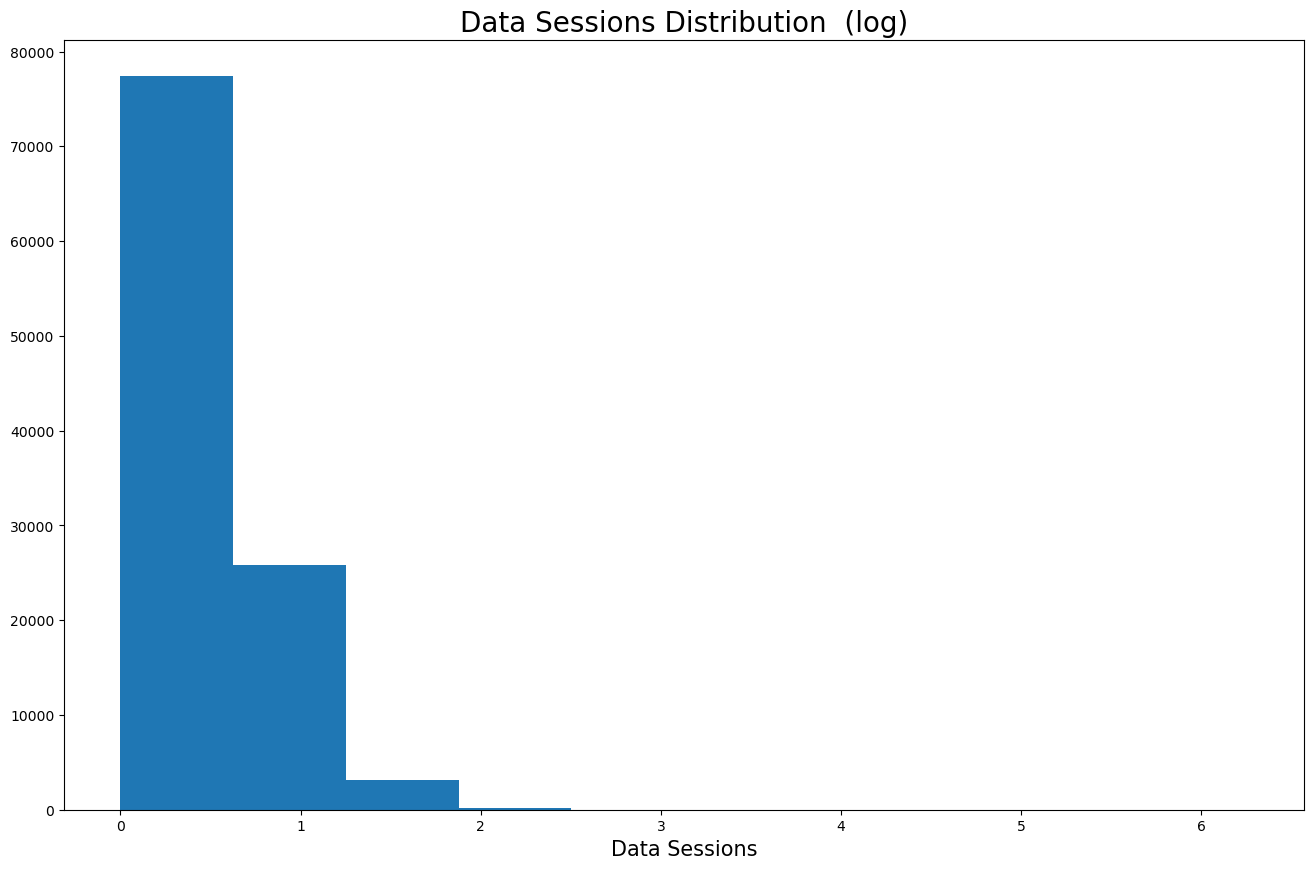

In [ ]:
plt.subplots(figsize=(16, 10))
plt.hist((xDR_session_log))
plt.title('Data Sessions Distribution  (log)', fontsize=20)
plt.xlabel('Data Sessions', fontsize=15)
plt.show()

 **Observation- from here we found that our xDR session is right skewed distribution which means most user uses below averagecount of xDR session on tellco platform**

In [ ]:
top_xDr = xDR_session.head(10)

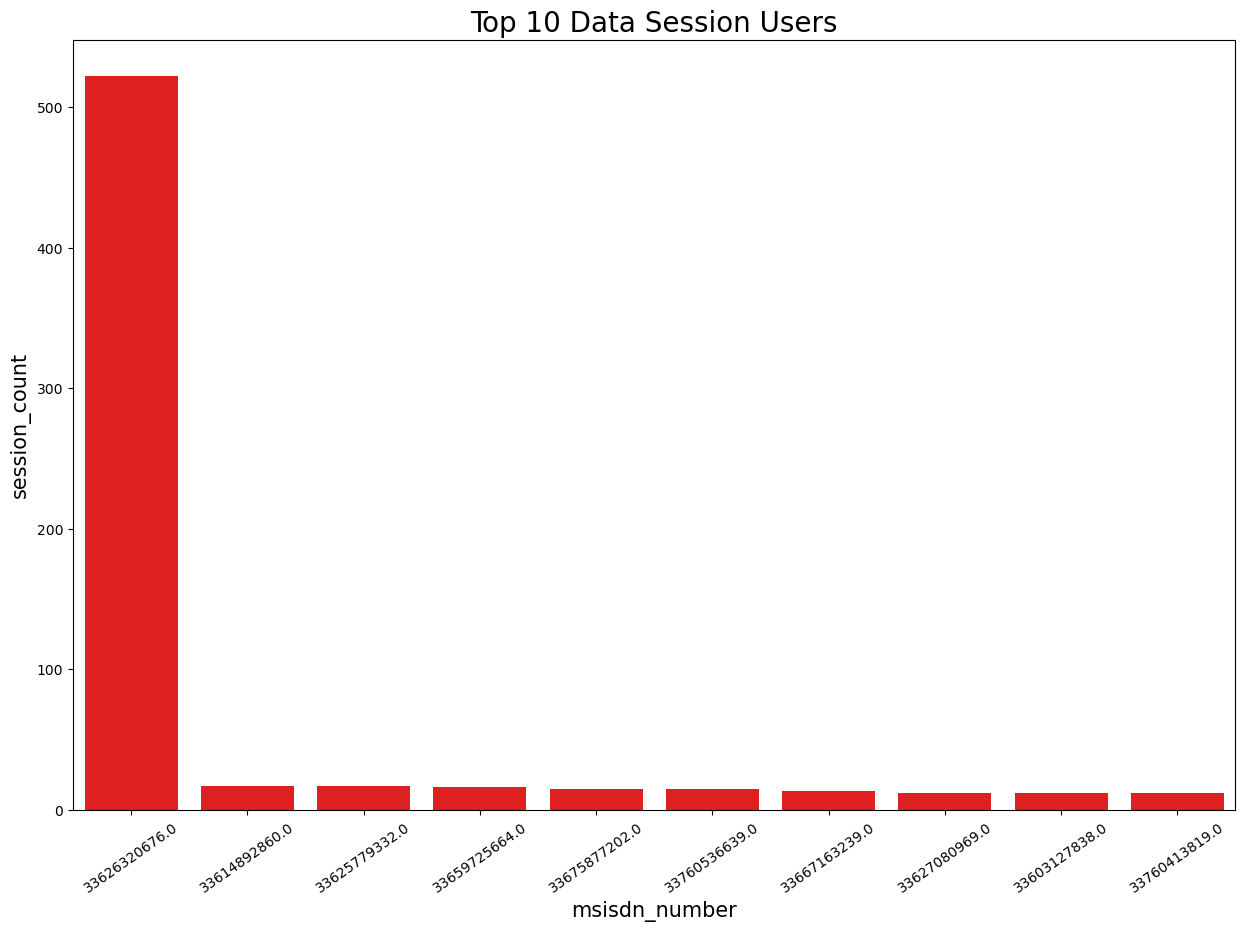

In [ ]:
plt.subplots(figsize=(15, 10))
plt.xticks(rotation=35)
plt.xlabel('msisdn_number', fontsize=15)
plt.ylabel('xDR Sessions',fontsize=15)
plt.title('Top 10 Data Session Users', fontsize=20)
sns.barplot(x='msisdn_number', y='session_count', data=top_xDr, color='r', order=top_xDr.msisdn_number.values.tolist())

plt.show()

In [ ]:
def calculate_session_duration_per_user(df):
    session_duration_per_user = df.groupby('msisdn_number')['dur___ms__1'].sum()
    
    return session_duration_per_user





In [ ]:
session_duration = calculate_session_duration_per_user(data)
print(session_duration)

msisdn_number
3.360100e+10    1.167201e+08
3.360100e+10    1.812310e+08
3.360100e+10    1.349694e+08
3.360101e+10    4.987802e+07
3.360101e+10    3.710445e+07
                    ...     
3.379000e+10    8.810688e+06
3.379000e+10    1.409887e+08
3.197021e+12    1.046091e+08
3.370000e+14    1.046091e+08
8.823971e+14    1.046091e+08
Name: dur___ms__1, Length: 106856, dtype: float64


In [ ]:
session_duration_df = session_duration.reset_index(name='time_spent')
session_duration_df

,msisdn_number,time_spent
0,3.360100e+10,1.167201e+08
1,3.360100e+10,1.812310e+08
2,3.360100e+10,1.349694e+08
3,3.360101e+10,4.987802e+07
4,3.360101e+10,3.710445e+07
...,...,...
106851,3.379000e+10,8.810688e+06
106852,3.379000e+10,1.409887e+08
106853,3.197021e+12,1.046091e+08
106854,3.370000e+14,1.046091e+08


In [ ]:
session_duration_df['time_spent']=session_duration_df['time_spent'].apply(lambda x: int(x/(1000*60*60)%24))

In [ ]:
session_duration_df.rename(columns={'time_spent':'hours_spent'}, inplace=True)

In [ ]:
session_duration_df

,msisdn_number,hours_spent
0,3.360100e+10,8
1,3.360100e+10,2
2,3.360100e+10,13
3,3.360101e+10,13
4,3.360101e+10,10
...,...,...
106851,3.379000e+10,2
106852,3.379000e+10,15
106853,3.197021e+12,5
106854,3.370000e+14,5


In [ ]:
sess_dur_stats = session_duration_df.hours_spent.describe().reset_index()
sess_dur_stats.rename(columns={'index':'session_duration_stats', 'time_spent':'value'}, inplace=True)
sess_dur_stats

,session_duration_stats,hours_spent
0,count,106856.000000
1,mean,11.706119
2,std,7.797046
3,min,0.000000
4,25%,5.000000
5,50%,11.000000
6,75%,19.000000
7,max,23.000000


In [ ]:
sum_hours = pd.Series({'sum':session_duration_df.hours_spent.sum()}).reset_index(name='hours_spent')
sum_hours=sum_hours.rename(columns={'index':'session_duration_stats'})
sum_hours = sum_hours.hours_spent.astype('int64')
sum_ = pd.Series(sum_hours, name='hours_spent').reset_index()
sum_['index'] = 'sum'
sum_=sum_.rename(columns={'index':'session_duration_stats'})
sum_.dtypes
sess_dur_stats=sess_dur_stats.append(sum_, ignore_index=True)#.reset_index(drop=True)
sess_dur_stats.hours_spent=sess_dur_stats.hours_spent.astype('int')
sess_dur_stats

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18596\1078651252.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sess_dur_stats=sess_dur_stats.append(sum_, ignore_index=True)#.reset_index(drop=True)


,session_duration_stats,hours_spent
0,count,106856
1,mean,11
2,std,7
3,min,0
4,25%,5
5,50%,11
6,75%,19
7,max,23
8,sum,1250869
9,sum,1250869


# **Interpretation**:
    1. Total hour spent by all user in the data session is 12,50,869 hrs
    2. average hour spendby a user in the data session is 11 hr
    3. maximum hour spent is 23 hr and mininum is 0

# ○	the total download (DL) and upload (UL) data

In [ ]:
app_data2 = data[[ 'social_media_dl__bytes_',
       'social_media_ul__bytes_', 'google_dl__bytes_', 'google_ul__bytes_',
       'email_dl__bytes_', 'email_ul__bytes_', 'youtube_dl__bytes_',
       'youtube_ul__bytes_', 'netflix_dl__bytes_', 'netflix_ul__bytes_',
       'gaming_dl__bytes_', 'gaming_ul__bytes_', 'other_dl__bytes_',
       'other_ul__bytes_']]
app_dataCorr = app_data2.corr(method='pearson')
app_dataCorr

,social_media_dl__bytes_,social_media_ul__bytes_,google_dl__bytes_,google_ul__bytes_,email_dl__bytes_,email_ul__bytes_,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_
social_media_dl__bytes_,1.000000,-0.000555,-0.001954,0.000186,0.004745,-0.002518,-0.001389,0.002345,-0.001817,0.003457,0.001018,0.003095,0.006126,0.000610
social_media_ul__bytes_,-0.000555,1.000000,0.003542,0.001085,0.004823,-0.001427,-0.001786,-0.002368,-0.000772,-0.002493,0.000210,0.000844,-0.003850,0.000971
google_dl__bytes_,-0.001954,0.003542,1.000000,-0.000103,-0.000039,0.000742,0.001760,0.000638,0.000548,-0.001569,-0.001421,-0.001429,-0.002557,-0.000882
google_ul__bytes_,0.000186,0.001085,-0.000103,1.000000,-0.001157,-0.002050,0.001122,0.001670,-0.001288,-0.004073,0.001140,-0.002516,0.002097,-0.002219
email_dl__bytes_,0.004745,0.004823,-0.000039,-0.001157,1.000000,0.002553,0.001679,-0.004305,0.001351,-0.000016,0.000050,-0.004335,-0.000444,0.004675
email_ul__bytes_,-0.002518,-0.001427,0.000742,-0.002050,0.002553,1.000000,-0.000320,-0.006834,-0.000011,0.000532,-0.002519,0.005000,-0.003805,0.000081
youtube_dl__bytes_,-0.001389,-0.001786,0.001760,0.001122,0.001679,-0.000320,1.000000,0.002433,0.001202,0.001746,-0.001861,-0.001893,0.002042,-0.004830
youtube_ul__bytes_,0.002345,-0.002368,0.000638,0.001670,-0.004305,-0.006834,0.002433,1.000000,0.000423,0.002477,-0.002382,0.000898,0.002296,-0.001393
netflix_dl__bytes_,-0.001817,-0.000772,0.000548,-0.001288,0.001351,-0.000011,0.001202,0.000423,1.000000,0.001065,-0.003201,-0.000633,-0.006000,-0.002588
netflix_ul__bytes_,0.003457,-0.002493,-0.001569,-0.004073,-0.000016,0.000532,0.001746,0.002477,0.001065,1.000000,-0.001051,-0.004015,-0.006691,-0.003447


In [ ]:
def calculate_total_data_per_user(df):
    
    # Group by user and calculate total UL and DL per user
    total_data_per_user = df.groupby('msisdn_number')['total_ul__bytes_', 'total_dl__bytes_'].sum()
    
    # Convert bytes to gigabytes
    total_data_per_user['total_ul_gb'] = total_data_per_user['total_ul__bytes_'] / (1024 * 1024 * 1024)  # Convert bytes to GB
    total_data_per_user['total_dl_gb'] = total_data_per_user['total_dl__bytes_'] / (1024 * 1024 * 1024)  # Convert bytes to GB
    
    # Drop the columns containing data in bytes
    total_data_per_user.drop(columns=['total_ul__bytes_', 'total_dl__bytes_'], inplace=True)
    
    return total_data_per_user



In [ ]:
total_data_per_user = calculate_total_data_per_user(data)
total_data_per_user.reset_index(inplace=True)




C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18596\3618216011.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_data_per_user = df.groupby('msisdn_number')['total_ul__bytes_', 'total_dl__bytes_'].sum()


In [ ]:
total_data_per_user

,msisdn_number,total_ul_gb,total_dl_gb
0,3.360100e+10,0.033577,0.784767
1,3.360100e+10,0.033625,0.112462
2,3.360100e+10,0.036607,0.518430
3,3.360101e+10,0.018931,0.374385
4,3.360101e+10,0.087806,1.269514
...,...,...,...
106851,3.379000e+10,0.024882,0.640680
106852,3.379000e+10,0.033278,0.414043
106853,3.197021e+12,0.034735,0.181448
106854,3.370000e+14,0.052762,0.502574


In [ ]:
def calculate_total_data_volume_per_application(df):
    app_columns = [col for col in df.columns if '_dl__bytes_' in col or '_ul__bytes_' in col]
    total_data_volume_per_application = df.groupby(df.index)[app_columns].sum()
    total_data_volume_per_application = total_data_volume_per_application.groupby(lambda x: x.split('_')[0], axis=1).sum()
    return total_data_volume_per_application




In [ ]:
total_data_volume_per_application = calculate_total_data_volume_per_application(data)
total_data_volume_per_application = total_data_volume_per_application.drop(['total'],axis = 1)
total_data_volume_per_application


,email,gaming,google,http,netflix,other,social,youtube
0,3.701304e+06,2.924265e+08,2.905912e+06,1.071562e+07,1.785519e+07,1.805588e+08,1.570185e+06,1.835594e+07
1,9.373850e+05,6.099208e+08,4.414096e+06,1.071562e+07,3.556554e+07,5.419594e+08,1.933278e+06,3.935912e+07
2,3.363124e+06,2.299803e+08,1.022912e+07,1.071562e+07,2.375120e+07,4.149084e+08,1.726277e+06,3.442524e+07
3,2.070983e+06,8.103879e+08,1.181176e+07,1.071562e+07,1.509259e+07,7.618372e+08,6.574930e+05,3.653476e+07
4,2.110349e+06,5.312370e+08,7.748843e+06,1.071562e+07,1.753980e+07,5.646198e+08,9.127880e+05,3.422225e+07
...,...,...,...,...,...,...,...,...
149996,6.908760e+05,5.358069e+08,1.278491e+07,1.071562e+07,3.756186e+07,1.675193e+07,3.517065e+06,2.795510e+07
149997,2.121718e+06,6.316281e+08,4.415361e+06,1.071562e+07,4.064329e+07,7.146381e+08,2.352181e+06,2.216552e+07
149998,2.058277e+06,5.669338e+08,6.585469e+06,1.071562e+07,1.502970e+07,1.324156e+08,1.260239e+06,2.451641e+07
149999,2.850914e+06,3.550664e+08,7.757267e+06,1.071562e+07,1.649484e+07,8.161200e+08,8.231090e+05,1.712251e+07


In [ ]:
app_data_stats = total_data_volume_per_application.describe()
app_data_stats

,email,gaming,google,http,netflix,other,social,youtube
count,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,2.259102e+06,4.303331e+08,7.807295e+06,1.071562e+07,2.262861e+07,4.293653e+08,1.828250e+06,2.264348e+07
std,1.071109e+06,2.440199e+08,3.516420e+06,9.666514e+06,9.260820e+06,2.432681e+08,1.035646e+06,9.246800e+06
min,8.359000e+03,3.063580e+05,4.033000e+04,8.000000e+01,9.843200e+04,1.490450e+05,1.563000e+03,7.890300e+04
25%,1.359344e+06,2.187279e+08,4.943599e+06,3.482221e+06,1.597946e+07,2.185534e+08,9.322180e+05,1.599846e+07
50%,2.263567e+06,4.316150e+08,7.812835e+06,1.071562e+07,2.263554e+07,4.299865e+08,1.826471e+06,2.266177e+07
75%,3.159818e+06,6.414159e+08,1.068280e+07,1.071562e+07,2.929044e+07,6.399275e+08,2.727487e+06,2.929260e+07
max,4.518036e+06,8.592028e+08,1.552878e+07,6.600530e+07,4.519815e+07,8.595209e+08,3.650861e+06,4.519008e+07


In [ ]:
app_data = total_data_volume_per_application
vals = [app_data.gaming.sum(), app_data.other.sum(),app_data.youtube.sum(),app_data.netflix.sum(), app_data.google.sum(),app_data.email.sum(),app_data.social.sum()]
vals

[64550395439016.7,
 64405230908181.62,
 3396545039272.6387,
 3394313609363.5386,
 1171101989130.5457,
 338867605596.30994,
 274239359454.20804]

In [ ]:
total_app_data = pd.DataFrame(columns=app_data.columns.to_list()[1:],data=[vals])
total_app_data=total_app_data.transpose().reset_index().rename(columns={'index':'application', 0:'total_data'})
total_app_data = total_app_data.sort_values(by='total_data', ascending=False)
total_app_data

,application,total_data
0,gaming,6.455040e+13
1,google,6.440523e+13
2,http,3.396545e+12
3,netflix,3.394314e+12
4,other,1.171102e+12
5,social,3.388676e+11
6,youtube,2.742394e+11


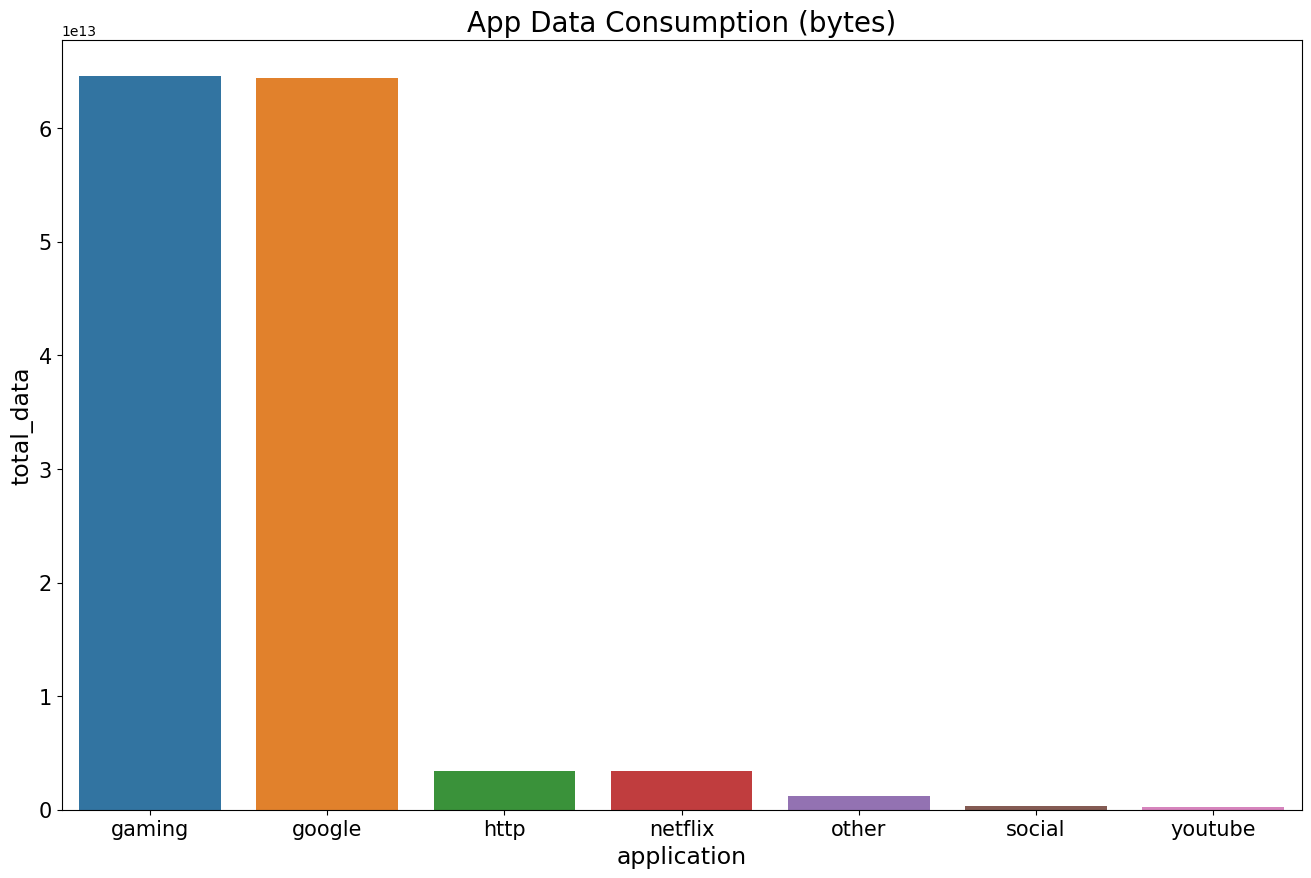

In [ ]:
plt.subplots(figsize=(16,10))
plt.title('App Data Consumption (bytes)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Application', fontsize=17)
plt.ylabel('Data Use (bytes)', fontsize=17)
sns.barplot(data=total_app_data, x='application', y='total_data')
plt.show()

1. **From the above, we can clearly see that gaming application has the highest data usage by users**

In [ ]:
total_app_dataCorr = total_data_volume_per_application.corr(method='pearson')

# Task 1.2 - Conduct exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing them with the mean of the corresponding column.

# ○	Describe all relevant variables and associated data types (slide). 
# ○	Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.

In [ ]:
def unistats(df):
    import pandas as pd
    output_df = pd.DataFrame(columns = ['Count','Missing','Unique','Dtype','Numeric','Mode','Mean','Min','25%','Median','75%','Max','Std','skew','Kurt','range','Variance','Interquartile Range (IQR)'])
    
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtypes,
                                  pd.api.types.is_numeric_dtype(df[col]),df[col].mode().values[0],df[col].mean(),df[col].min(),
                                  df[col].quantile(0.25),df[col].median(),df[col].quantile(0.75),df[col].max(),df[col].std(),
                                  df[col].skew(),df[col].kurt(), df[col].max()-df[col].min(),df[col].var(),df[col].quantile(0.75)-df[col].quantile(0.25) ]
        else:
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtypes,
                                  pd.api.types.is_numeric_dtype(df[col]),df[col].mode().values[0],'-','-',
                                  '-','-','-','-','-','-','-','-','-','-']
    return output_df

unistats(data)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,skew,Kurt,range,Variance,Interquartile Range (IQR)
bearer_id,150001,0,134709,object,False,,-,-,-,-,-,-,-,-,-,-,-,-
msisdn_number,150001,0,106856,object,False,33626320676.0,-,-,-,-,-,-,-,-,-,-,-,-
dur___ms__1,150001,0,115693,float64,True,104609105.546013,92853043.307477,7142988.0,57442058.0,86399983.0,116737316.0,244900015.0,49348942.303067,0.582375,0.110971,237757027.0,2435318106431438.5,59295258.0
http_dl__bytes_,150001,0,51157,float64,True,9783912.793228,9783912.793228,40.0,3028893.0,9783912.793228,9783912.793228,62431581.0,9006130.849944,2.064567,6.616649,62431541.0,81110392886311.328125,6755019.793228
http_ul__bytes_,150001,0,49532,float64,True,931706.962231,931706.962231,40.0,336016.0,931706.962231,931706.962231,3820189.0,831381.65358,1.633146,2.593887,3820149.0,691195453909.798462,595690.962231
activity_duration_dl__ms_,150001,0,75936,float64,True,460214.774155,216913.703741,0.0,14878.0,39305.0,460214.774155,1676451.0,319815.721619,2.053706,4.546839,1676451.0,102282095794.520584,445336.774155
activity_duration_ul__ms_,150001,0,80333,float64,True,1408879.96752,374334.606212,0.0,21540.0,46794.0,599089.0,1465401.0,543960.58471,1.187648,-0.380067,1465401.0,295893117717.999512,577549.0
handset_manufacturer,150001,0,154,object,False,apple,-,-,-,-,-,-,-,-,-,-,-,-
handset_type,150001,0,1396,object,False,huawei b528s-23a,-,-,-,-,-,-,-,-,-,-,-,-
social_media_dl__bytes_,150001,0,146856,float64,True,152013.0,1795321.773647,12.0,899148.0,1794369.0,2694938.0,3586064.0,1035482.275953,-0.002136,-1.202894,3586052.0,1072223543812.812988,1795790.0


# ○	Variable transformations – segment the users into the top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 

In [ ]:
top5_deciles_a = data.groupby('msisdn_number')['dur___ms__1'].sum().reset_index(name='duration').sort_values(by='duration')
data['total_DataLink_MB'] =round((((data.total_dl__bytes_ + data.total_ul__bytes_)/1024)/1024),4)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18596\872826463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_DataLink_MB'] =round((((data.total_dl__bytes_ + data.total_ul__bytes_)/1024)/1024),4)


In [ ]:
top5_deciles_b = data.groupby('msisdn_number')['total_DataLink_MB'].sum().reset_index(name='total_data').sort_values(by='total_data')
top5_deciles_b

,msisdn_number,total_data
34696,3.365920e+10,31.7087
43677,3.366132e+10,32.0204
63657,3.366668e+10,32.4246
104769,3.378251e+10,36.1721
76161,3.367548e+10,36.2609
...,...,...
76363,3.367588e+10,7525.5496
13180,3.362578e+10,8105.8701
92923,3.376054e+10,8120.3213
6437,3.361489e+10,8436.4191


In [ ]:
top5_deciles = top5_deciles_a.merge(top5_deciles_b, on='msisdn_number')
top5_deciles

,msisdn_number,duration,total_data
0,3.376351e+10,7.142988e+06,532.4696
1,3.366566e+10,7.146574e+06,647.0846
2,3.365933e+10,7.189000e+06,266.8424
3,3.369839e+10,7.258080e+06,797.9008
4,3.365043e+10,7.267018e+06,199.2166
...,...,...,...
106851,3.362578e+10,1.890414e+09,8105.8701
106852,3.367588e+10,1.927235e+09,7525.5496
106853,3.361489e+10,1.933339e+09,8436.4191
106854,3.365973e+10,2.087582e+09,7348.8835


In [ ]:
top5_deciles['rank'] = pd.qcut(top5_deciles.duration, q=10, labels=False)
top5_deciles

,msisdn_number,duration,total_data,rank
0,3.376351e+10,7.142988e+06,532.4696,0
1,3.366566e+10,7.146574e+06,647.0846,0
2,3.365933e+10,7.189000e+06,266.8424,0
3,3.369839e+10,7.258080e+06,797.9008,0
4,3.365043e+10,7.267018e+06,199.2166,0
...,...,...,...,...
106851,3.362578e+10,1.890414e+09,8105.8701,9
106852,3.367588e+10,1.927235e+09,7525.5496,9
106853,3.361489e+10,1.933339e+09,8436.4191,9
106854,3.365973e+10,2.087582e+09,7348.8835,9


In [ ]:
#Get the top 5 decile classes
top5_deciles = top5_deciles.query('rank >=5')
top5_deciles = top5_deciles.sort_values('rank', ascending=False)
top5_deciles

,msisdn_number,duration,total_data,rank
106855,3.362632e+10,6.688563e+10,514745.0107,9
99738,3.365813e+10,2.892524e+08,1013.9711,9
99736,3.362199e+10,2.892218e+08,824.0704,9
99735,3.365078e+10,2.892099e+08,1215.6133,9
99734,3.365217e+10,2.892058e+08,890.2965,9
...,...,...,...,...
60552,3.365067e+10,1.137840e+08,380.6658,5
60551,3.366112e+10,1.137830e+08,461.3105,5
60550,3.369966e+10,1.137808e+08,334.9081,5
60549,3.369996e+10,1.137802e+08,466.7340,5


In [ ]:
# Compute the total data session per decile classes
top5_deciles=top5_deciles.groupby('rank')['total_data'].sum().reset_index(name='total_data').sort_values('total_data', ascending=False)

top5_deciles['rank'] = ['Class a', 'Class b', 'Class c', 'Class d', 'Class e']

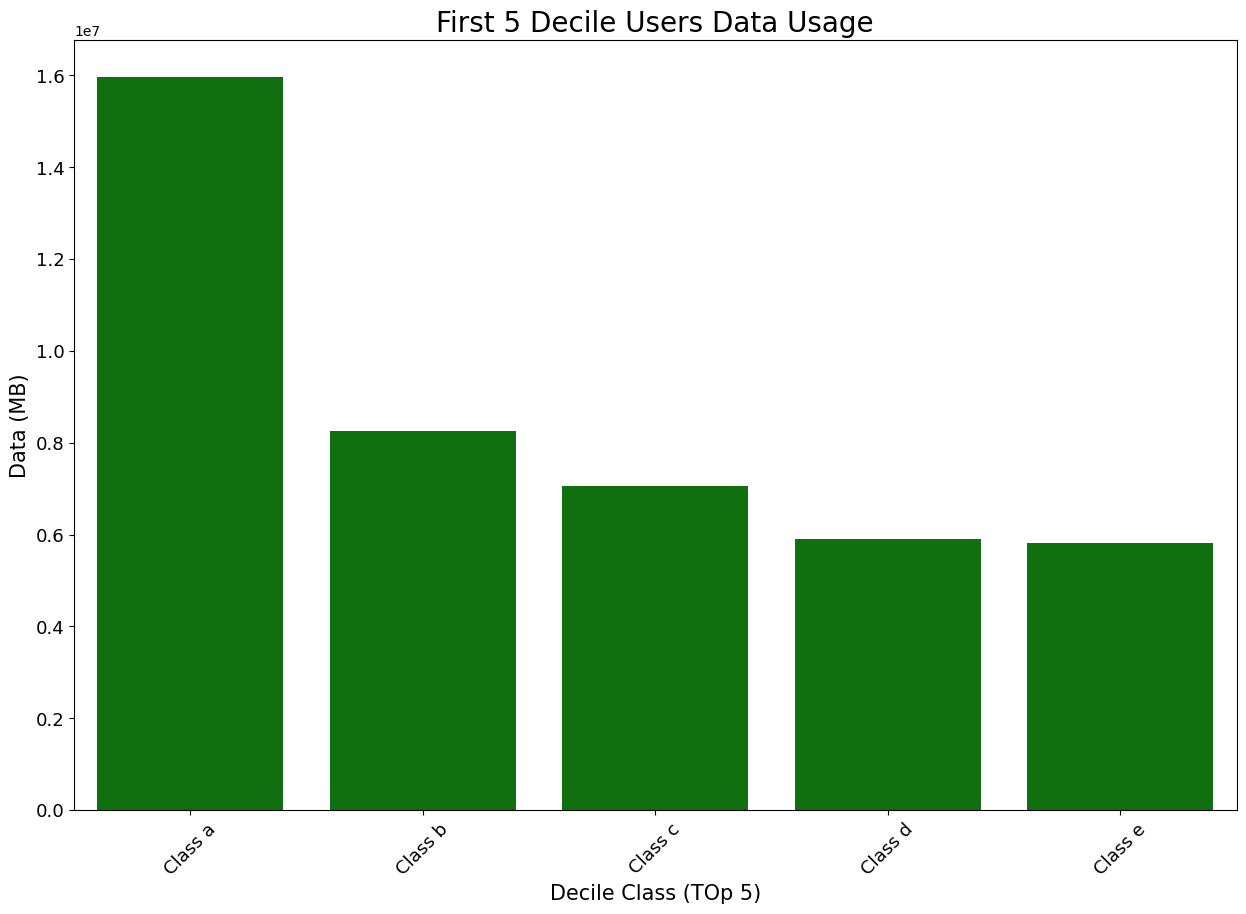

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='rank', y='total_data', data=top5_deciles,
            order=top5_deciles['rank'], color='g')
plt.title('First 5 Decile Users Data Usage', fontsize=20)
plt.ylabel('Data (MB)', fontsize=15)
plt.xlabel('Decile Class (TOp 5)', fontsize=15)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.show()

o There is significant gap among the data usage of the first decile class compared to other classes

o The difference within each classes decreases as new classes are added

o This could suggest a relationship between data usage and decile classes

o It also suggests that there might be a uniform/normal distribution in data usage among users


# Graphical Univariate Analysis

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18596\3922943007.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((session_duration_df['hours_spent']), hist=True)


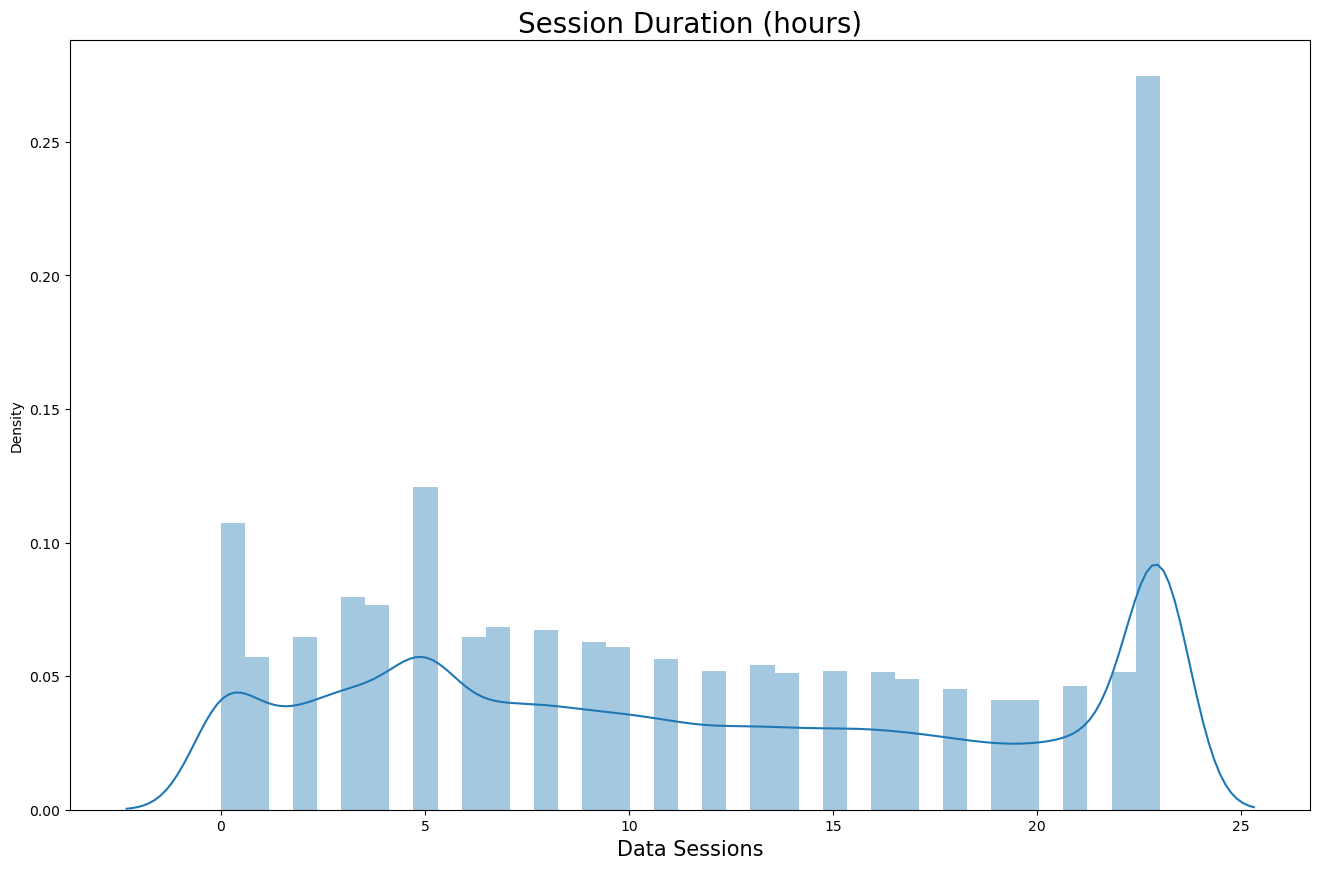

In [ ]:
plt.subplots(figsize=(16, 10))
sns.distplot((session_duration_df['hours_spent']), hist=True)
plt.title('Session Duration (hours)', fontsize=20)
plt.xlabel('Data Sessions', fontsize=15)
plt.show()

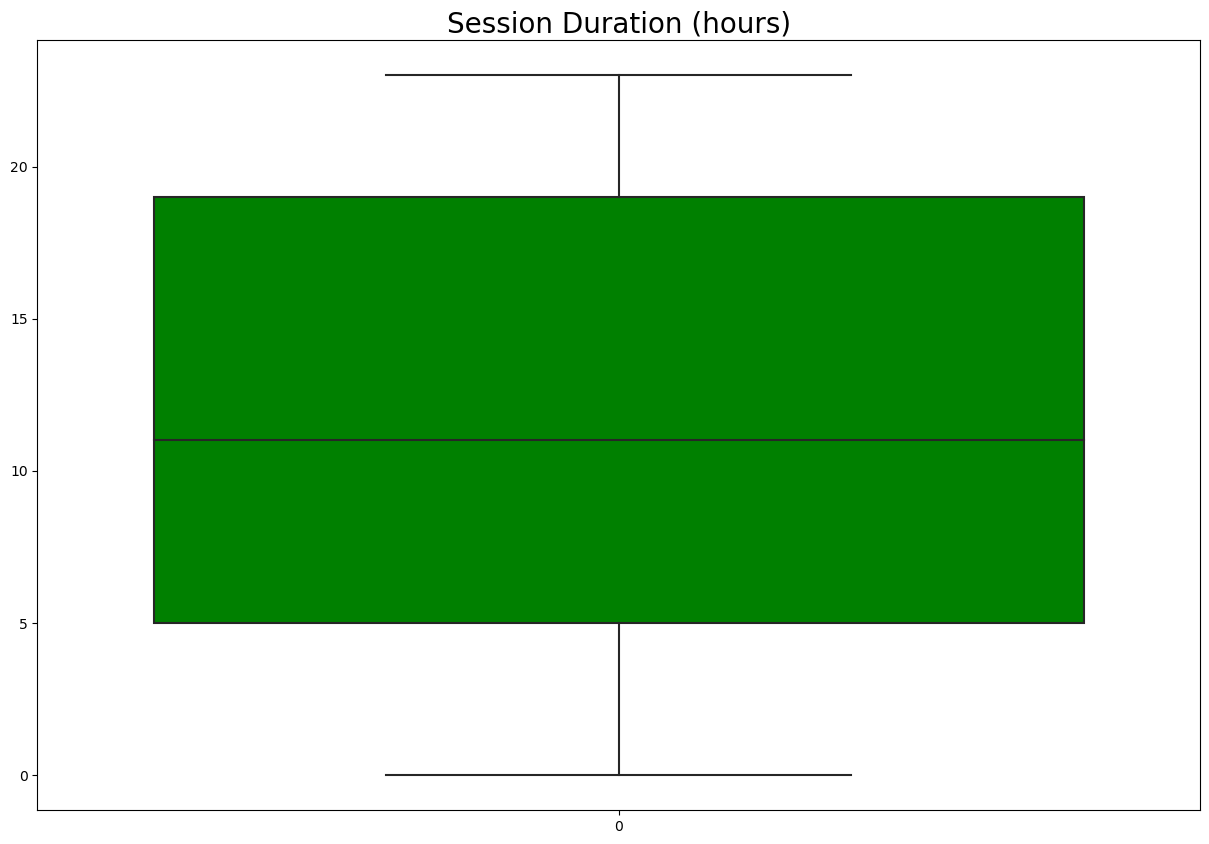

In [ ]:
plt.subplots(figsize=(15, 10))
sns.boxplot(data=session_duration_df['hours_spent'], color='g', saturation=10, )
plt.title('Session Duration (hours)', fontsize = 20)
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'social_media_dl__bytes_'),
  Text(0, 1.5, 'social_media_ul__bytes_'),
  Text(0, 2.5, 'google_dl__bytes_'),
  Text(0, 3.5, 'google_ul__bytes_'),
  Text(0, 4.5, 'email_dl__bytes_'),
  Text(0, 5.5, 'email_ul__bytes_'),
  Text(0, 6.5, 'youtube_dl__bytes_'),
  Text(0, 7.5, 'youtube_ul__bytes_'),
  Text(0, 8.5, 'netflix_dl__bytes_'),
  Text(0, 9.5, 'netflix_ul__bytes_'),
  Text(0, 10.5, 'gaming_dl__bytes_'),
  Text(0, 11.5, 'gaming_ul__bytes_'),
  Text(0, 12.5, 'other_dl__bytes_'),
  Text(0, 13.5, 'other_ul__bytes_')])

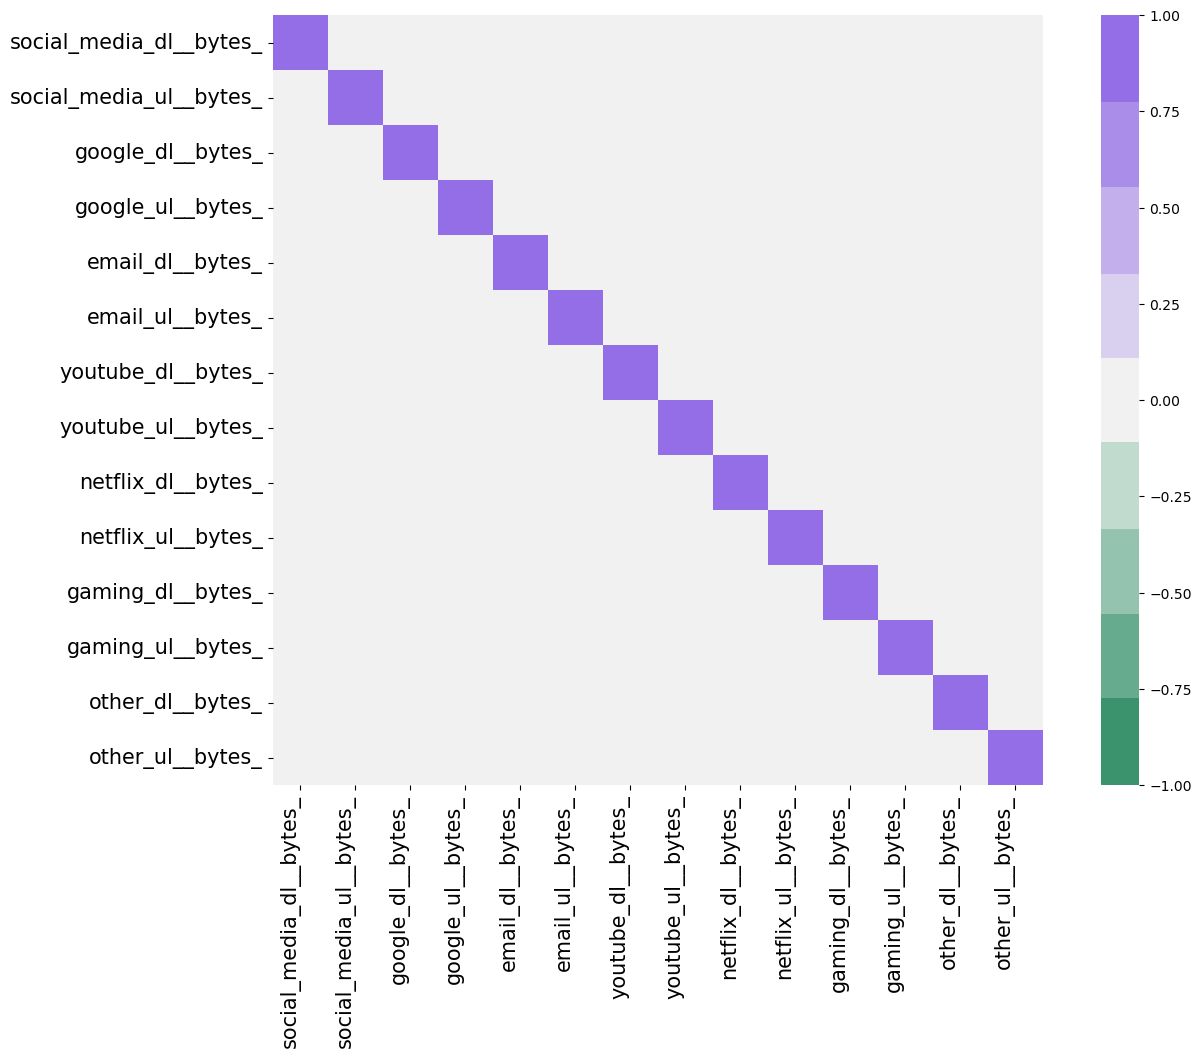

In [ ]:
# Plotting correlation for application data:

plt.subplots(figsize=(15, 10))
ax = sns.heatmap(
    app_dataCorr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

 **The above heatmap, shows that there is a very low corralation among the various applications without adding thier uplink and donwlink**

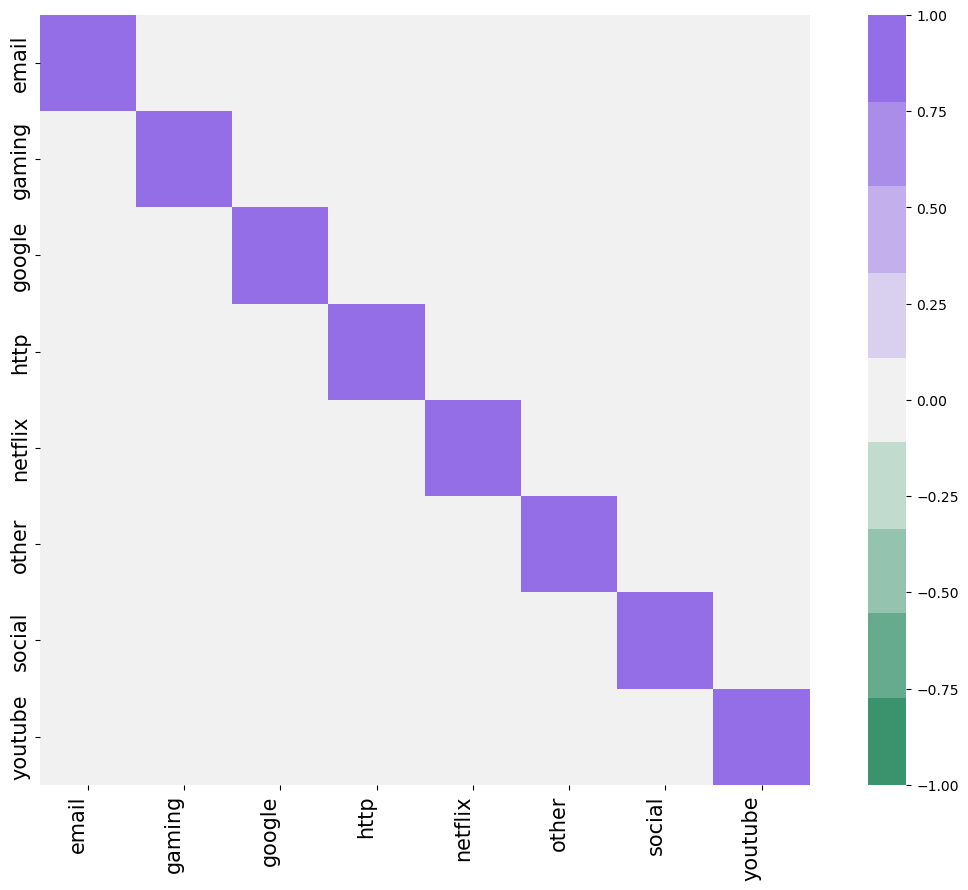

In [ ]:
# plotting correlation for total data volume per application
plt.subplots(figsize=(15, 10))
ax = sns.heatmap(
    total_app_dataCorr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# **Interpretation**
o There is no very little or no correaltion between the various application data usage

o Hence the use of one does not significantly affect the usage of the other

# bivariate analysis

<Axes: title={'center': 'App Data Consumption (bytes)'}>

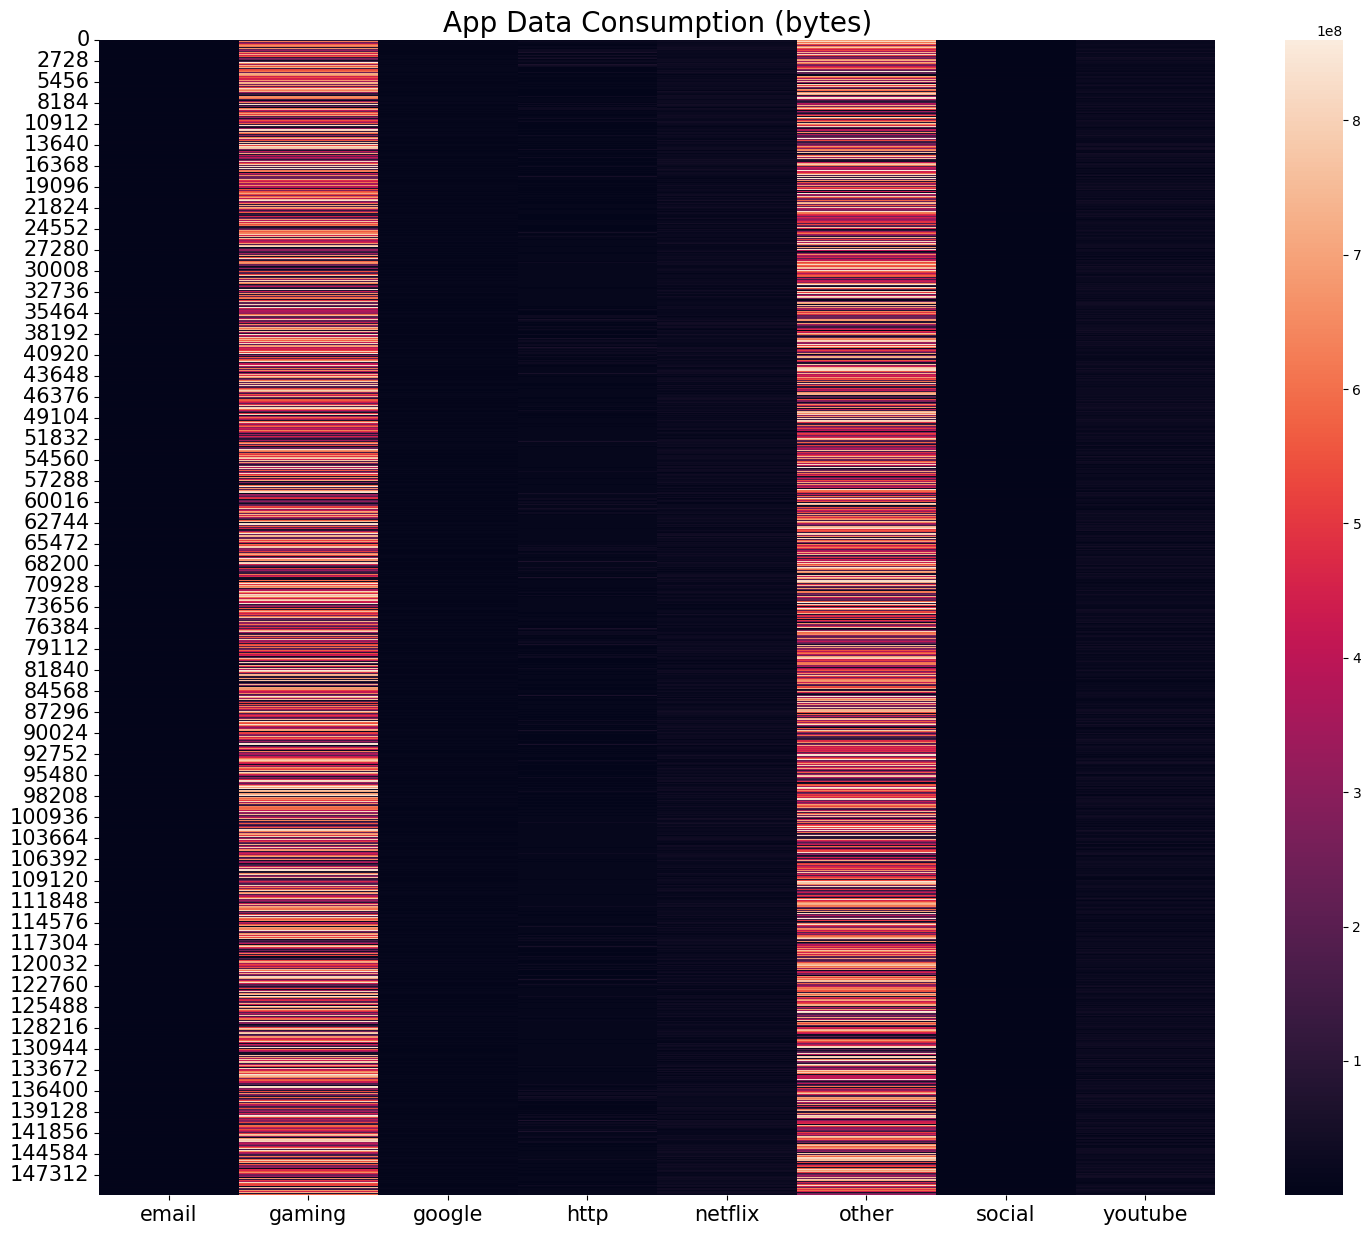

In [ ]:
app_data_heat = app_data
plt.subplots(figsize=(18,15))
plt.title('App Data Consumption (bytes)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.heatmap(app_data_heat)


**INterpretation**
o The above best exaplains the bar chart..

o our legend ranges from low values (dark red) to high values (light - red)

o Gaming application & other application have the highest colour heat of high values

o This further accentuates the fact that gaming application & other applicationhas the highest data consumption among other applications

o The data cinsumption of other applications are very low relative to that of gaming  and other application

# Now Let's perform PCA on the application data  using the PCA modlue from skLearn library

In [ ]:
data.msisdn_number = data.msisdn_number.astype('float')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18596\954960844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.msisdn_number = data.msisdn_number.astype('float')


In [ ]:
num_data = data.select_dtypes(include='number')

In [ ]:
num_data = num_data.drop('decile_class',axis = 1)
num_data

,msisdn_number,dur___ms__1,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,social_media_dl__bytes_,social_media_ul__bytes_,google_dl__bytes_,google_ul__bytes_,...,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_,total_DataLink_MB
0,3.366496e+10,1.046091e+08,9.783913e+06,931706.962231,37624.000000,38787.000000,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,...,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08,329.6179
1,3.368185e+10,1.046091e+08,9.783913e+06,931706.962231,168.000000,3560.000000,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,...,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08,674.4245
2,3.376063e+10,1.046091e+08,9.783913e+06,931706.962231,0.000000,0.000000,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,...,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08,293.4370
3,3.375034e+10,1.046091e+08,9.783913e+06,931706.962231,3330.000000,37882.000000,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,...,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08,848.1529
4,3.369980e+10,1.046091e+08,9.783913e+06,931706.962231,0.000000,0.000000,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,...,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08,579.5301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,3.365069e+10,8.123076e+07,9.783913e+06,931706.962231,42376.000000,41915.000000,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,...,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08,602.5354
149997,3.366345e+10,9.797070e+07,9.783913e+06,931706.962231,17264.000000,16759.000000,2.344568e+06,7613.00000,2.229420e+06,2.185941e+06,...,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08,673.0880
149998,3.362189e+10,9.824953e+07,9.783913e+06,931706.962231,25003.000000,28640.000000,1.245845e+06,14394.00000,3.850890e+06,2.734579e+06,...,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08,598.6201
149999,3.361962e+10,9.791063e+07,9.783913e+06,931706.962231,13405.000000,34088.000000,8.015470e+05,21562.00000,4.189773e+06,3.567494e+06,...,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08,382.9212


In [ ]:
pca_data = StandardScaler().fit_transform(num_data)
pca_data = pd.DataFrame(pca_data, columns=num_data.columns)

<IPython.core.display.Javascript object>

In [ ]:
pca_data

,msisdn_number,dur___ms__1,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,social_media_dl__bytes_,social_media_ul__bytes_,google_dl__bytes_,google_ul__bytes_,...,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_,total_DataLink_MB
0,-0.003346,0.238224,0.0,0.0,-5.606050e-01,-6.168622e-01,-0.241006,-0.447668,-1.243931,-0.659804,...,-1.340826,-0.509712,-0.211575,-0.590090,1.266183e+00,-1.025295,1.152432e-01,-3.902779e-01,-0.597047,-6.143561e-01
1,-0.003339,0.238224,0.0,0.0,-6.777229e-01,-6.816226e-01,0.126310,-1.355534,-0.682010,-0.955003,...,1.276880,0.997973,0.978915,0.765290,-1.488221e+00,0.435041,1.423855e+00,1.132499e+00,0.814043,8.651522e-01
2,-0.003306,0.238224,0.0,0.0,-6.782482e-01,-6.881672e-01,-0.107456,0.489083,0.841411,-0.304626,...,0.581550,0.886360,-0.760810,-0.788879,-1.650280e+00,-0.042795,-8.490348e-01,-1.182101e+00,-0.716127,-7.696024e-01
3,-0.003311,0.238224,0.0,0.0,-6.678359e-01,-6.185259e-01,-1.111757,-1.028955,0.989089,0.614738,...,0.652005,0.352078,-1.557333,1.547316,5.355411e-01,1.348412,9.504079e-01,1.968821e-01,1.603109,1.610592e+00
4,-0.003331,0.238224,0.0,0.0,-6.782482e-01,-6.881672e-01,-0.900764,0.908106,0.150353,-0.467247,...,1.253421,0.817482,-1.664689,0.433102,-9.949638e-01,0.532922,1.183799e+00,-2.301403e-01,0.468971,4.579759e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,-0.003352,-0.235513,0.0,0.0,-5.457464e-01,-6.111118e-01,1.612445,1.008232,1.274325,0.639349,...,0.118829,0.930360,1.364329,0.428603,1.900207e-01,-1.718046,1.095121e+00,1.474415e+00,0.489601,5.566879e-01
149997,-0.003346,0.103704,0.0,0.0,-6.242669e-01,-6.573579e-01,0.530427,-1.331963,-1.064141,0.108747,...,-0.428834,1.148412,1.618279,0.839657,-7.429647e-01,1.196854,-1.217667e+00,-1.772456e-01,0.868372,8.594175e-01
149998,-0.003363,0.109354,0.0,0.0,-6.000685e-01,-6.355162e-01,-0.530650,-0.975183,-0.574135,0.569821,...,-1.442542,-0.247266,-0.933411,0.538987,1.067584e+00,-1.233530,6.395339e-01,-5.543847e-01,0.565832,5.398880e-01
149999,-0.003364,0.102487,0.0,0.0,-6.363333e-01,-6.255007e-01,-0.959725,-0.598041,-0.471725,1.269801,...,-0.426137,-1.234849,0.341355,-0.284907,-1.204120e+00,1.618445,-1.438014e+00,-1.026483e+00,-0.338933,-3.856404e-01


# Calculate PCA

In [ ]:
pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(pca_data)
pca.shape

<IPython.core.display.Javascript object>

(150001, 5)

In [ ]:
pca

array([[ 1.04625147e+00, -6.24302803e-01, -5.58190763e-01,
         5.25111982e-01,  5.63190225e-01],
       [-1.48512992e+00, -6.53471274e-01,  1.55719621e+00,
         5.97710397e-01, -9.97683778e-01],
       [ 1.32801955e+00, -7.10746410e-01, -1.59369997e+00,
         6.70374866e-01,  6.01928840e-01],
       ...,
       [-9.49627768e-01, -6.21966680e-01, -8.55481225e-01,
         4.94062883e-01,  6.60113399e-01],
       [ 6.52706590e-01, -6.23851619e-01, -1.43515995e+00,
         5.85387497e-01, -1.10000414e+00],
       [-6.81452889e-06,  1.07584058e-05, -2.02935320e-05,
        -4.27257781e-05, -4.28869171e-04]])

In [ ]:
pcamodel.components_

array([[ 2.49861004e-03, -3.83841572e-03, -1.33321061e-03,
         1.48603384e-04,  5.09693481e-03,  4.70306890e-03,
        -2.94538135e-03,  2.49170438e-04, -6.44377456e-03,
        -3.30478602e-03, -2.54421910e-03,  1.23061188e-03,
        -1.37383239e-02, -1.19754558e-02, -1.34703963e-02,
        -1.23264975e-02, -5.76445349e-01, -1.16364853e-02,
         2.04422517e-03, -8.85812684e-03, -2.27036768e-02,
        -5.76892482e-01, -5.77379186e-01],
       [-2.25201810e-03, -6.47119331e-02,  5.00640744e-01,
         5.04900076e-01,  4.21844919e-01,  5.58477096e-01,
        -1.25106460e-03,  3.58500978e-04, -2.52075414e-03,
         5.09937681e-03, -1.71714374e-03,  5.70327533e-03,
         4.05356278e-03,  4.12978433e-03,  9.51216685e-04,
         7.81268164e-03,  2.05617687e-03,  5.77034488e-03,
         8.44064281e-03,  1.56903959e-03,  1.02291795e-02,
         2.14556890e-03,  2.61220188e-03],
       [ 7.00257664e-03,  2.80262576e-04, -1.10102349e-02,
        -1.05757000e-02, -2.1

In [ ]:
pcamodel.n_components_

5

In [ ]:
pcamodel.explained_variance_

array([2.99950542, 2.38231203, 1.98804869, 1.44726348, 1.01606684])

In [ ]:
pcamodel.explained_variance_ratio_

array([0.13041241, 0.10357809, 0.08643632, 0.06292408, 0.04417652])

In [ ]:
with open("..\models\pca_model.pkl","wb") as f:
    pickle.dump(pca,f)

# > Plot the explained variance

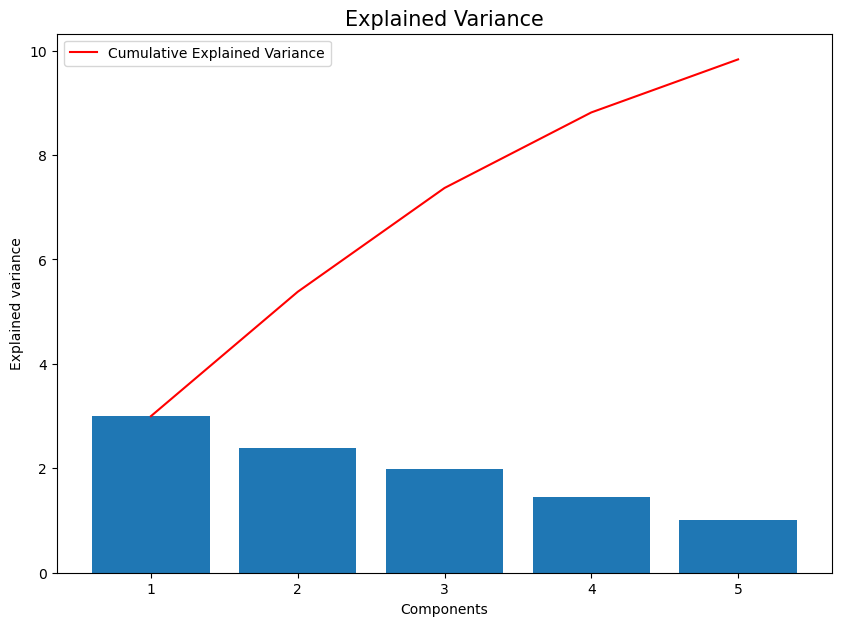

In [ ]:
plt.subplots(figsize=(10,7))
plt.title('Explained Variance', fontsize=15)
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.show()

# Plot explained_variance_ratio_

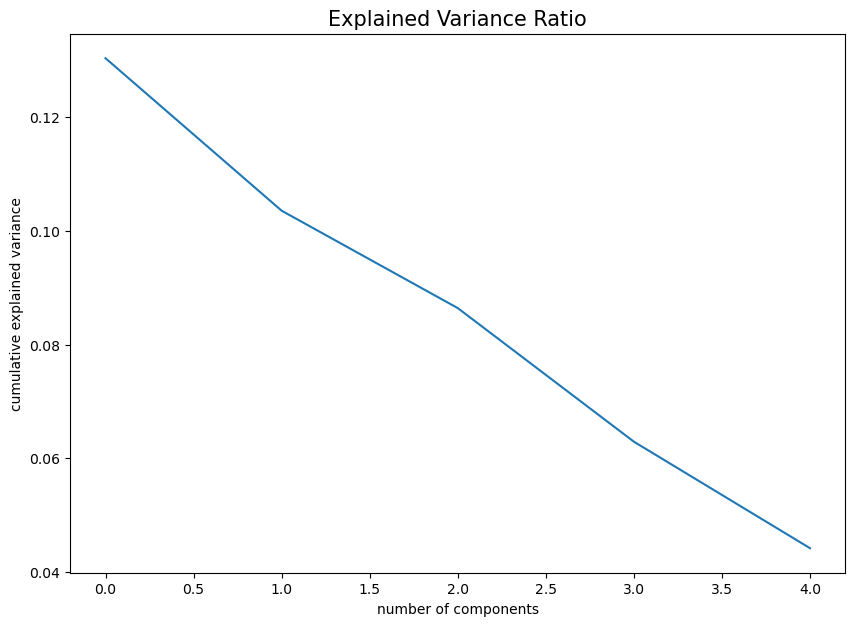

In [ ]:
plt.subplots(figsize=(10,7))
plt.title('Explained Variance Ratio', fontsize=15)
plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#PCA1 is at 0 in xscale

# > Scree plot

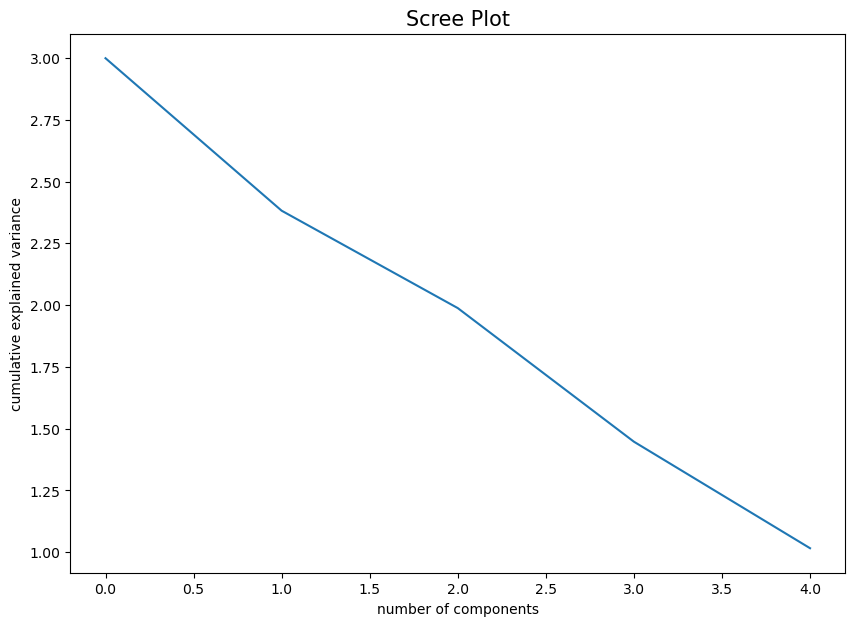

In [ ]:
plt.subplots(figsize=(10,7))
plt.title('Scree Plot', fontsize=15)
plt.plot(pcamodel.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**o -  It can be seen from plots that, PCA-1 explains most of the variance than subsequent components.**

**o - In other words, most of the features are explained and encompassed by PCA1**

# > Scatter plot of PCA1 and PCA2

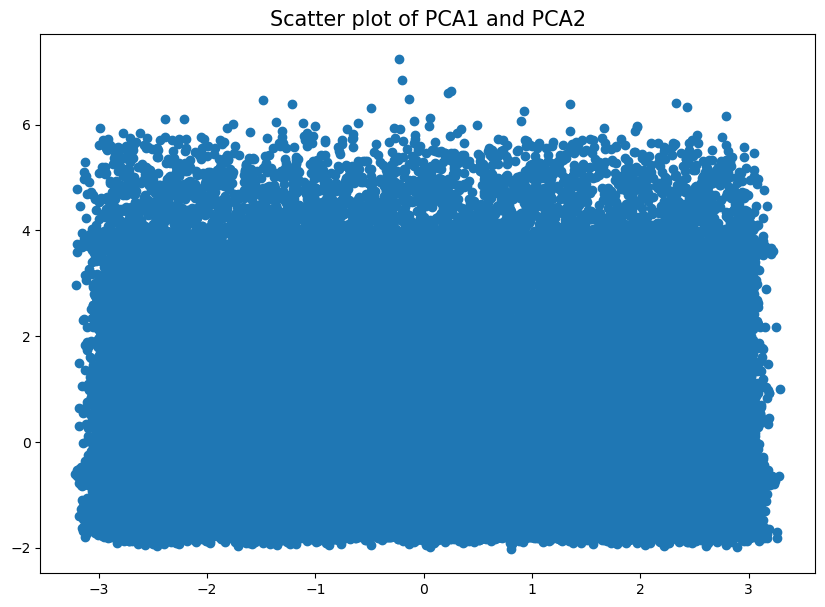

In [ ]:
plt.subplots(figsize=(10,7))
plt.scatter(pca[:, 0], pca[:, 1])
plt.title('Scatter plot of PCA1 and PCA2', fontsize=15)
plt.show()

# Effect of variables on each components

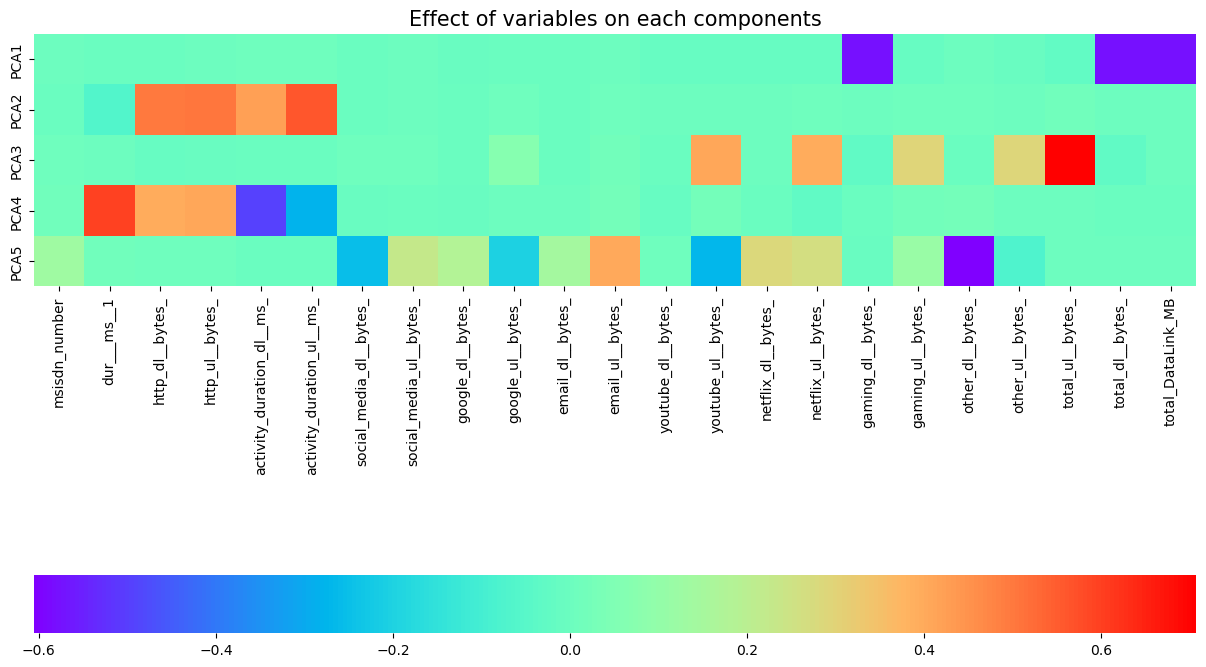

In [ ]:
plt.subplots(figsize=(15, 25))
plt.title('Effect of variables on each components', fontsize=15)
ax = sns.heatmap(pcamodel.components_,
                 cmap='rainbow', 
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1,)],
                 xticklabels=list(pca_data.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.show()

**> From the above PCA 1 & 2 have the most effect on our variables**

# PCA Biplot

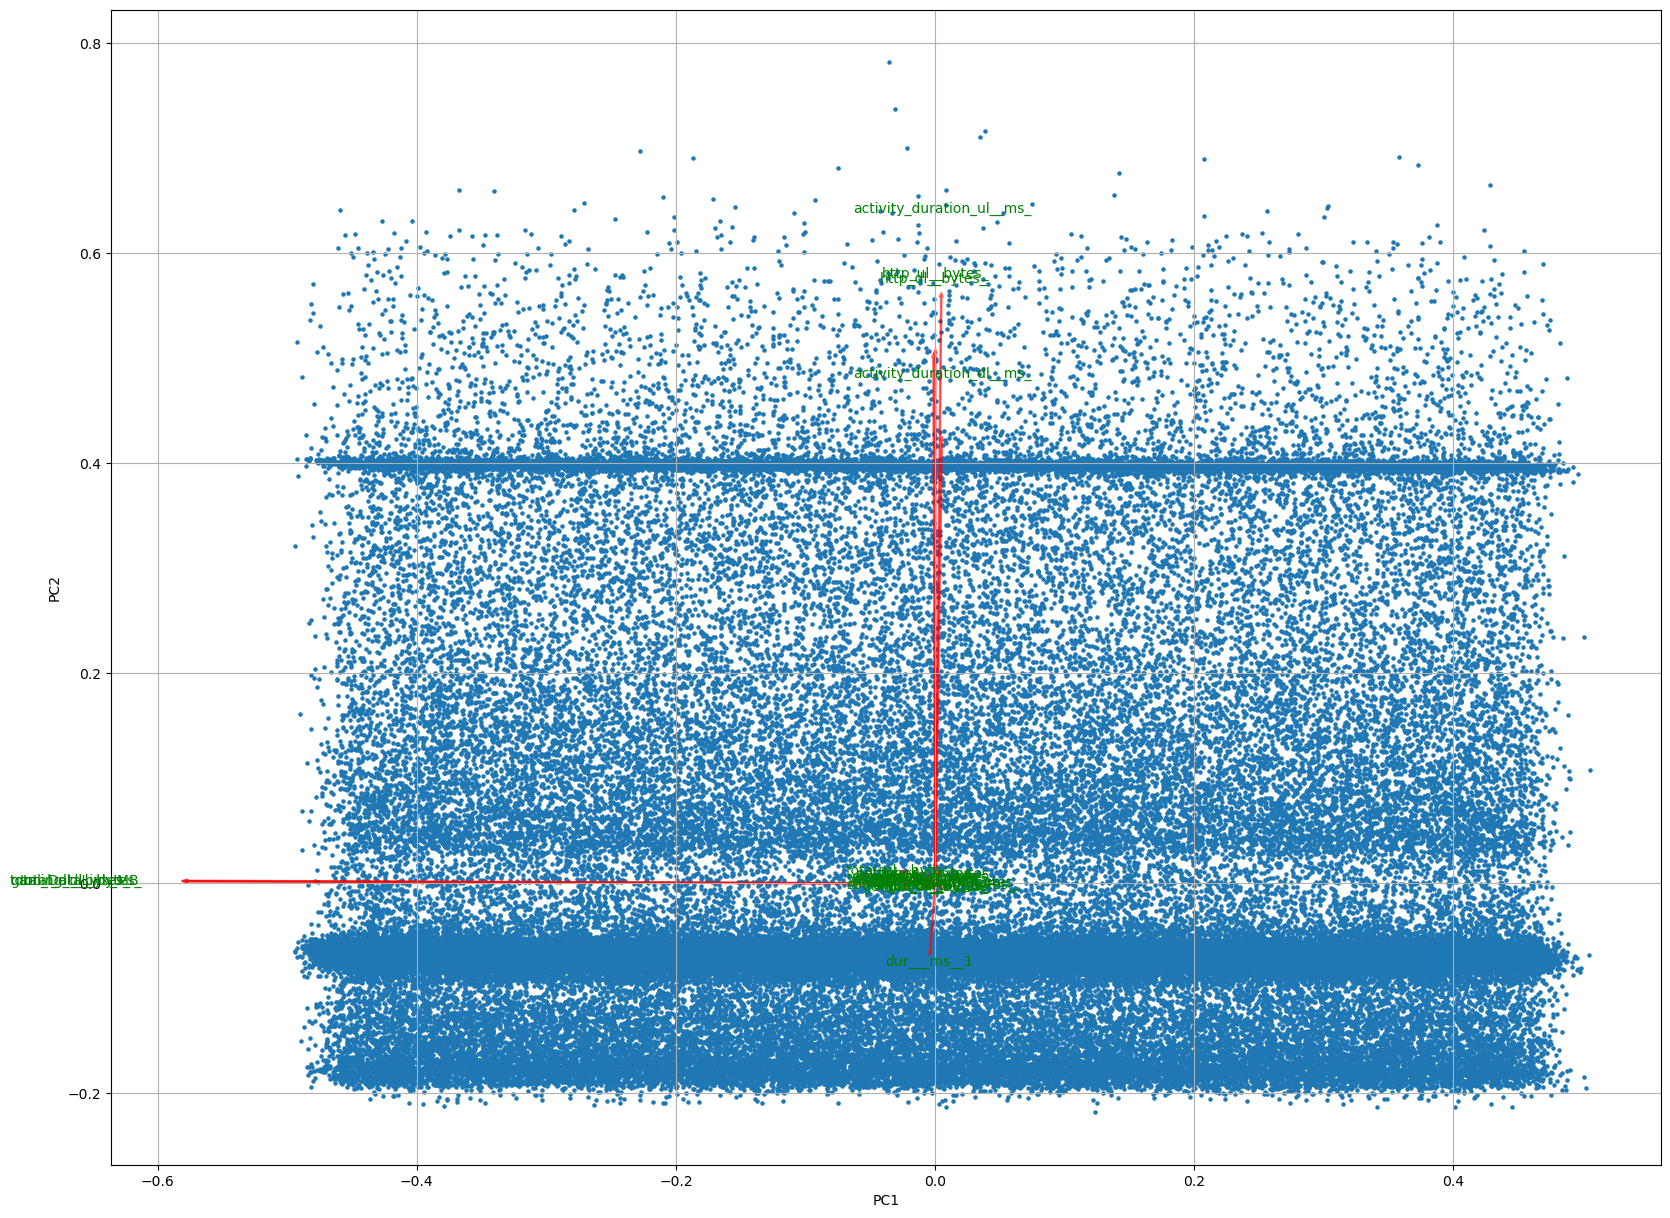

In [ ]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.subplots(figsize=(20,15))
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

biplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(pca_data.columns))
plt.show()